<a href="https://colab.research.google.com/github/DyanHarden/Praktikum-Data-Mining/blob/main/checkpoint5_2209116022_Praktikum_Datmin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis Data Skor Benchmark Pada GPU (Graphic Processing Unit) Komputer Sebagai Bahan Acuan User Dalam Memilih GPU Yang Sesuai Kebutuhan.**






### IMPORT LIBRARY

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

#library untuk build model
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay,f1_score, precision_score, recall_score, roc_auc_score, silhouette_score, calinski_harabasz_score, davies_bouldin_score

from scipy.cluster.hierarchy import linkage

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve

# **BUSSINES UNDERSTANDING**






- Bussines Objective

Tujuan bisnis dari dataset ini adalah untuk menganalisis faktor-faktor yang memengaruhi keputusan pengguna dalam membeli VGA Card untuk komputer Mereka. Hal ini bertujuan untuk memberikan pemahaman yang lebih baik kepada produsen dan penjual GPU tentang preferensi pengguna serta meningkatkan keputusan pembelian yang efisien.
Selain itu, tujuan bisnisnya adalah untuk mempromosikan dan mendorong penggunaan GPU dalam komputasi, sehingga meningkatkan kesadaran dalam adopsi teknologi GPU di berbagai bidang seperti gaming, desain grafis, dan kecerdasan buatan.

- Assess Situation

Situasi bisnis yang mendasari analisis ini adalah meningkatnya permintaan akan GPU untuk keperluan komputasi yang semakin kompleks. Di Sisi Lain, Terdapat berbagai pilihan GPU dengan beragam spesifikasi, namun pengguna sering kali menghadapi kesulitan dalam memilih GPU yang sesuai dengan preferensi kebutuhan dan anggaran mereka.

- Data Mining Goals

Tujuan dari Data Mining pada dataset ini adalah untuk memprediksi preferensi pengguna terhadap GPU berdasarkan skor test benchmark dan fitur-fitur pendukung lainnya. Selain itu, adalah untuk menganalisis faktor-faktor yang memengaruhi keputusan pembelian pengguna seperti performa, kategori, dan kebutuhan lainnya. Melalui analisis data, diharapkan dapat meningkatkan pemahaman tentang preferensi dan kebutuhan pengguna dalam memilih GPU untuk komputer, Laptop, maupun AIO PC mereka.

- Project Plan

Rencana proyek untuk menganalisis dataset ini dimulai dengan pengumpulan data skor benchmark GPU dari berbagai sumber Data, kemudian akan dijelaskan karakteristiknya dan pola-pola yang menarik akan diidentifikasi, seperti tren performa GPU dari waktu ke waktu atau perbandingan antara harga dan performa gpu berdasarkan benchmark. Selanjutnya. Kualitas data akan dinilai dan masalah data akan diidentifikasi agar dapat diatasi dalam tahapan berikutnya, seperti penanganan data yang hilang atau outlier. Langkah-langkah ini penting untuk menjamin keberhasilan dari analisis data dan akurasi prediksi preferensi pengguna terhadap GPU.

# **DATA UNDERSTANDING**

## **Collect Initial Data**

Data tentang hasil skor benchmark GPU yang saya dapatkan bersumber dari dataset dari website Kaggle dengan judul "GPU Benchmarks Compilation".
Berikut Linkya datasetnya:
https://www.kaggle.com/datasets/alanjo/gpu-benchmarks/data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/DyanHarden/Praktikum-Data-Mining/main/GPU_benchmarks_v7.csv')
df.head(20)

,gpuName,G3Dmark,G2Dmark,price,gpuValue,TDP,powerPerformance,testDate,category
0,GeForce RTX 3090 Ti,29094,1117,2099.99,13.85,450.0,64.650000,2022,Unknown
1,GeForce RTX 3080 Ti,26887,1031,1199.99,22.41,350.0,76.820000,2021,Desktop
2,GeForce RTX 3090,26395,999,1749.99,15.08,350.0,75.410000,2020,Desktop
3,Radeon RX 6900 XT,25458,1102,1120.31,22.72,300.0,84.860000,2020,Desktop
4,GeForce RTX 3080,24853,1003,999.00,24.88,320.0,77.660000,2020,Desktop
5,GeForce RTX 3070 Ti,23367,1003,749.99,31.16,290.0,80.580000,2021,Desktop
6,Radeon RX 6800 XT,23364,1078,859.00,27.20,300.0,77.880000,2020,Desktop
7,RTX A5000,22867,984,2631.20,8.69,230.0,99.420000,2021,Workstation
8,RTX A6000,22122,832,4999.99,4.42,300.0,73.740000,2021,Workstation
9,GeForce RTX 3070,22093,969,719.99,30.69,220.0,100.420000,2020,Desktop


## **Describe Data**

### Informasi Dasar

In [3]:
print("Jumlah baris pada Dataset:", df.shape[0])
print("Jumlah kolom pada Dataset:", df.shape[1])

Jumlah baris pada Dataset: 2317
Jumlah kolom pada Dataset: 9


Penjelasan Dasar Dataset:

1. gpuName: Kolom ini berisi nama model GPU.

2. G3Dmark: Kolom ini menyimpan nilai G3Dmark, yang merupakan skor benchmark untuk kinerja rendering 3D dari GPU. Semakin tinggi nilai G3Dmark, semakin baik kinerja rendering 3D GPU tersebut.

3. G2Dmark: Kolom ini menyimpan nilai G2Dmark, yang merupakan skor benchmark untuk kinerja rendering 2D dari GPU. Semakin tinggi nilai G2Dmark, semakin baik kinerja rendering 2D GPU tersebut.

4. price: Kolom ini berisi harga GPU dalam mata uang tertentu.

5. gpuValue: Kolom ini mewakili nilai GPU, dihitung sebagai rasio antara skor G3Dmark dan harga. Semakin tinggi nilai gpuValue, semakin baik nilai performa GPU relatif terhadap harganya.

6. TDP: Kolom ini berisi nilai TDP (Thermal Design Power) dari GPU, yang mengindikasikan jumlah daya yang diharapkan dikonsumsi oleh GPU saat beroperasi secara normal. Semakin rendah nilai TDP, semakin efisien GPU dalam mengonsumsi daya.

7. powerPerformance: Kolom ini mewakili kinerja daya GPU, dihitung sebagai rasio antara skor G3Dmark dan TDP. Semakin tinggi nilai powerPerformance, semakin baik kinerja daya GPU relatif terhadap konsumsi daya yang diharapkan.

8. testDate: Kolom ini menyimpan tahun pengujian GPU.

9. category: Kolom ini berisi kategori GPU, misalnya Desktop, Mobile, dan Lain-lain.


### Informasi Lanjutan

In [4]:
df_info = df.info()
df_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2317 entries, 0 to 2316
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gpuName           2317 non-null   object 
 1   G3Dmark           2317 non-null   int64  
 2   G2Dmark           2317 non-null   int64  
 3   price             553 non-null    float64
 4   gpuValue          553 non-null    float64
 5   TDP               692 non-null    float64
 6   powerPerformance  692 non-null    float64
 7   testDate          2317 non-null   int64  
 8   category          2317 non-null   object 
dtypes: float64(4), int64(3), object(2)
memory usage: 163.0+ KB


**Penjelasan Lanjutan**:

1. RangeIndex: Indeks dari dataset ini memiliki rentang dari 0 hingga 2316, yang menunjukkan jumlah total baris atau entri dalam dataset.

2. Data columns (total 9 columns): Ada total 9 kolom dalam dataset.

3. Non-Null Count: Menunjukkan jumlah nilai non-null (tidak kosong) dalam setiap kolom.
  - gpuName, G3Dmark, G2Dmark, dan testDate memiliki 2317 nilai non-null, artinya tidak ada nilai yang hilang dalam kolom-kolom tersebut.
  - Kolom lainnya memiliki jumlah nilai non-null yang lebih kecil, yang menunjukkan bahwa ada nilai yang hilang dalam kolom-kolom tersebut. Jumlah non-null count dalam kolom price, gpuValue, TDP, dan powerPerformance adalah 553 dan 692.

4. Dtype: Menunjukkan tipe data dari setiap kolom.
  - object: Kolom-kolom dengan tipe data object umumnya berisi teks atau string.
  - int64: Kolom-kolom dengan tipe data int64 adalah kolom numerik yang berisi bilangan bulat.
  - float64: Kolom-kolom dengan tipe data float64 adalah kolom numerik yang berisi bilangan pecahan

### Informasi Statistik Deskriftip

In [5]:
deskripsi_statistik = df.describe()
deskripsi_statistik

,G3Dmark,G2Dmark,price,gpuValue,TDP,powerPerformance,testDate
count,2317.000000,2317.000000,553.00000,553.000000,692.000000,692.000000,2317.000000
mean,2046.512732,352.051791,439.74660,10.405515,98.968064,34.103634,2013.956841
std,3758.139908,226.631283,763.59252,10.879097,82.878671,36.604351,3.911129
min,1.000000,7.000000,17.50000,0.000000,4.400000,0.630000,2009.000000
25%,130.000000,171.000000,109.99000,1.690000,35.000000,7.592500,2010.000000
50%,649.000000,307.000000,209.00000,6.580000,75.000000,20.825000,2013.000000
75%,1953.000000,494.000000,435.00000,16.430000,147.000000,49.120000,2017.000000
max,29094.000000,1117.000000,8999.00000,69.730000,500.000000,204.000000,2022.000000


**Penjelasan Deskriftip Statistik**:

1. Count: Menunjukkan jumlah nilai non-null (tidak kosong) dalam setiap kolom. Jumlahnya bervariasi untuk setiap kolom karena beberapa kolom memiliki nilai yang hilang (missing values).

2. Mean: Rata-rata dari nilai dalam setiap kolom. Ini memberikan gambaran tentang nilai rata-rata dari data dalam kolom tersebut.

3. Std: Standar deviasi dari nilai dalam setiap kolom. Ini mengukur seberapa tersebar data di sekitar rata-rata. Semakin tinggi nilai standar deviasi, semakin besar variasi atau dispersi data.

4. Min: Nilai terkecil dalam setiap kolom.

5. 25%: Kuartil pertama (Q1). Nilai ini menunjukkan batas bawah dari kuartil bawah (25%) dari data.

6. 50%: Median atau kuartil kedua (Q2). Nilai ini adalah nilai tengah dari data, yang membagi data menjadi dua bagian yang sama besar.

7. 75%: Kuartil ketiga (Q3). Nilai ini menunjukkan batas atas dari kuartil atas (75%) dari data.

8. Max: Nilai terbesar dalam setiap kolom.



## **Exploratory Data Analysis**

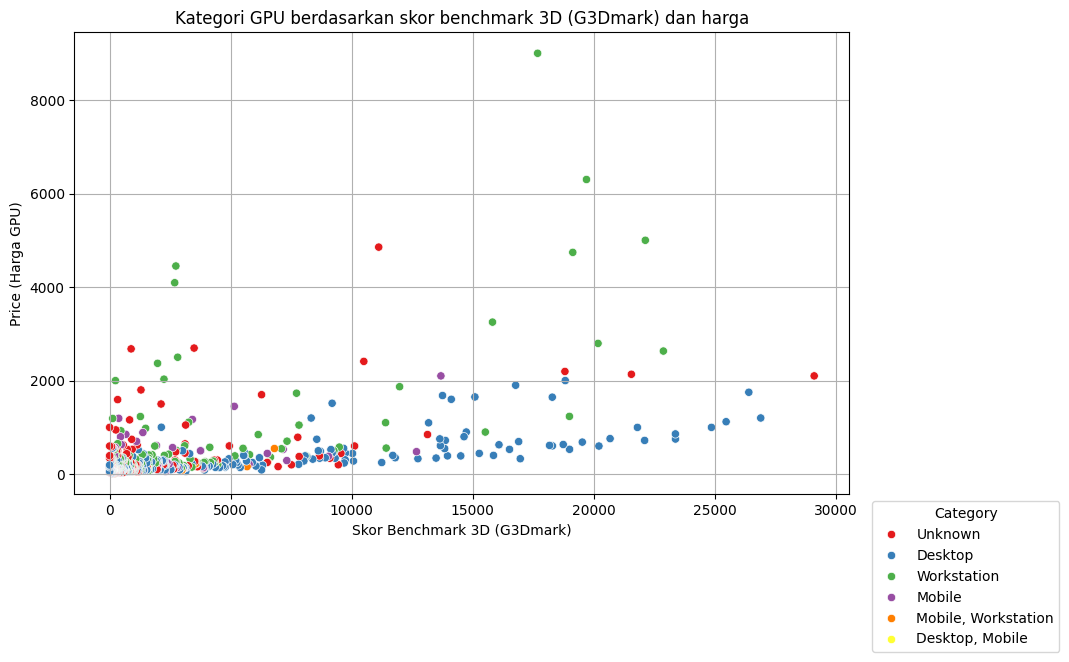

In [6]:
filtered_df = df.dropna(subset=['G3Dmark', 'price'])


plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='G3Dmark', y='price', hue='category', palette='Set1')
plt.title('Kategori GPU berdasarkan skor benchmark 3D (G3Dmark) dan harga')
plt.xlabel('Skor Benchmark 3D (G3Dmark)')
plt.ylabel('Price (Harga GPU)')
plt.legend(title='Category', loc='upper left', bbox_to_anchor=(1.02, 0))
plt.grid(True)
plt.show()

**PENJELASAN**:

Scatter plot yang dihasilkan menunjukkan hubungan antara skor benchmark 3D (G3Dmark) dan harga GPU untuk setiap kategori. Ini memungkinkan pengguna melihat sebaran data GPU berdasarkan skor 3D dan harga, serta kategori GPU yang sesuai kebutuhan.

1. Korelasi
*   Skor Benchmark 3D (G3Dmark): Sebagai pengukuran kinerja GPU dalam rendering grafis 3D, skor benchmark 3D menjadi parameter penting bagi pengguna yang mempertimbangkan kinerja grafis dari GPU yang akan dibeli. Semakin tinggi skor benchmark 3D, semakin baik kinerja grafis yang dihasilkan.
*   Harga GPU (Price): Scatter plot menunjukkan korelasi antara harga dan skor benchmark 3D, yang mana sebaran harga GPU berdasarkan skor 3Dnya. Ini membantu pengguna membandingkan nilai kinerja (skor 3D) dengan harga GPU yang akan mereka bayar.

2. Solutif
* Kesimpulannya, jika user atau konsumen ingin mendapatkan GPU dengan kinerja tinggi dengan harga terbaik, maka GPU dengan kategori Desktop merupakan pilihan yang cocok dan *Sweet Spot*, karena GPU Desktop memiliki kinerja tinggi dengan harga tidak setinggi beberapa GPU kategori Workstation yang juga memiliki kinerja tinggi.

<br>
Note: Kategori "Uknown" Merupakan GPU yang tidak dijual belikan secara umum oleh brand karena bisa berupa GPU prototype atapun hanya digunakan instansi dan kepentingan tertentu saja, namun data benchmarknya tersedia walaupun beberapa data lainnya tidak ada.






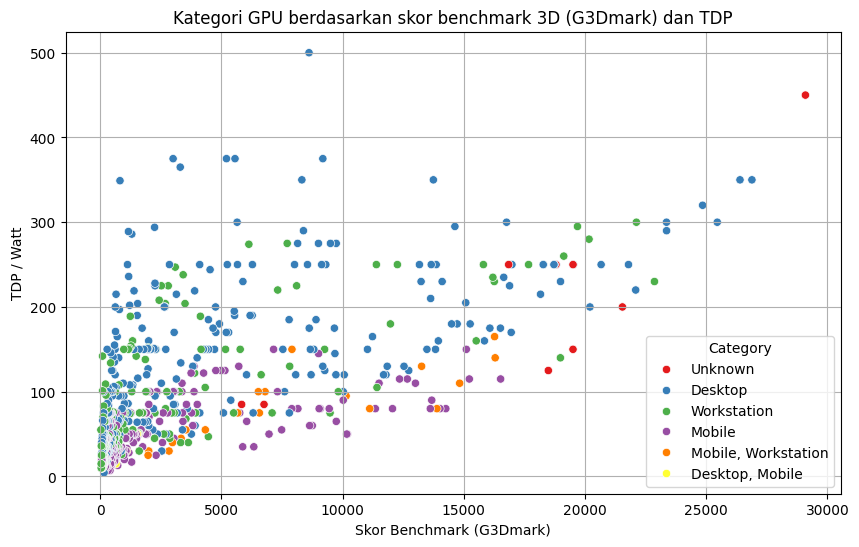

In [7]:
filtered_df = df.dropna(subset=['G3Dmark', 'TDP'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='G3Dmark', y='TDP', hue='category', palette='Set1')
plt.title('Kategori GPU berdasarkan skor benchmark 3D (G3Dmark) dan TDP')
plt.xlabel('Skor Benchmark (G3Dmark)')
plt.ylabel('TDP / Watt')
plt.legend(title='Category', loc='lower right')
plt.grid(True)
plt.show()

**PENJELASAN**:

Scatter plot yang dihasilkan menunjukkan hubungan antara skor benchmark 3D (G3Dmark) dan konsumsi daya termal (TDP) untuk setiap kategori GPU. Plot scatter ini membantu pengguna memahami hubungan antara kinerja grafis (skor 3D) dan TDP dari GPU yang dapat dipertimbangkan user dalam efisiensi dan penggunaan daya listrik GPU dalam kondisi ***full load*** atau dalam keadaan aktif.

1. Korelasi
* Skor Benchmark 3D (G3Dmark): Skor benchmark 3D menunjukkan seberapa baik kinerja grafis yang dihasilkan oleh GPU. Skor yang lebih tinggi menunjukkan seberapa baik kinerja grafis yang dihasilkan oleh GPU.
* TDP (Thermal Design Power): TDP adalah ukuran daya maksimum yang diperlukan oleh GPU dalam kondisi operasi normal. Scatter plot menunjukkan korelasi antara TDP dan skor benchmark 3D, di mana pengguna dapat melihat sebaran data GPU berdasarkan kinerja grafis (skor 3D) dan konsumsi daya (TDP).

2. Solutif
* Kesimpulannya, Jika pengguna menginginkan GPU dengan efisiensi daya terbaik dengan kinerja yang baik pula, maka tidak disarankan menggunakan GPU untuk PC seperti Desktop dan Workstation dikarenakan kategori gpu tersebut memiliki TDP yang cukup tinggi. Maka, Penggunaan GPU dengan kategori Mobile dan Mobile Workstationlah pilihan yang cocok bagi pengguna yang memerlukan GPU dengan efisiensi daya yang tinggi. Namun Perlu diingat bahwa GPU kategori Mobile ini biasanya diciptakan untuk ***All in One PC*** seperti Notebook dan Laptop, jadi tidak dapat dibeli terpisah seperti GPU Desktop dan harga jualnya juga lebih tinggi.

<br>
Note: Kategori "Uknown" Merupakan GPU yang tidak dijual belikan secara umum oleh brand karena bisa berupa GPU prototype atapun hanya digunakan instansi dan kepentingan tertentu saja, namun data benchmarknya tersedia walaupun beberapa data lainnya tidak ada.


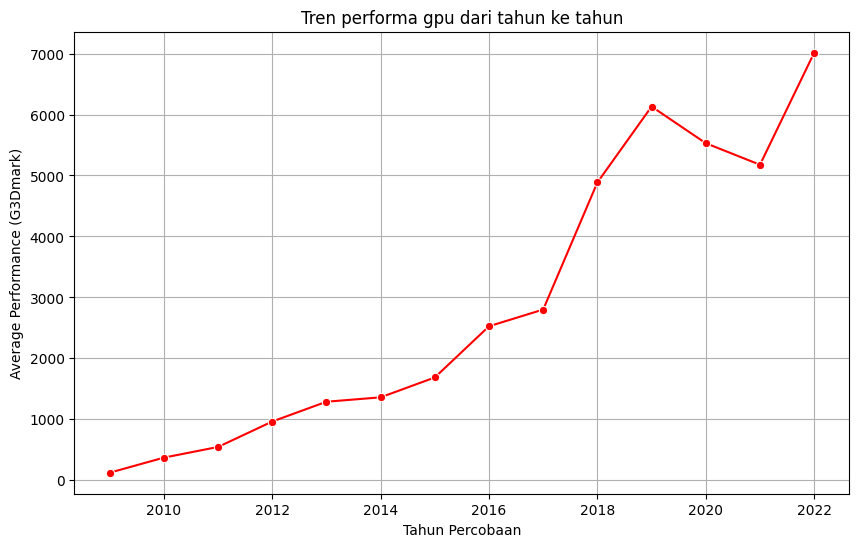

In [8]:
avg_performance_by_year = df.groupby('testDate')['G3Dmark'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_performance_by_year, x='testDate', y='G3Dmark', marker='o', color='red')
plt.title('Tren performa gpu dari tahun ke tahun')
plt.xlabel('Tahun Percobaan')
plt.ylabel('Average Performance (G3Dmark)')
plt.grid(True)
plt.show()

<a name="penjelasan-tren-gpu"></a>
####**PENJELASAN**:

Visualisasi yang dihasilkan adalah sebuah line plot yang menunjukkan tren performa rata-rata GPU dari tahun ke tahun, berdasarkan skor benchmark 3D (G3Dmark). Grafik ini membantu pengguna melihat bagaimana performa rata-rata GPU berubah seiring berjalannya waktu, yang dapat menjadi acuan untuk melihat tren perkembangan teknologi GPU dari tahun ke tahun.

1. Korelasi
* Tahun Percobaan (testDate): Tahun percobaan merupakan tahun di mana GPU diuji benchmark. Dengan menggunakan kolom ini sebagai sumbu x dalam line plot, pengguna dapat melihat bagaimana performa rata-rata GPU berubah dari tahun ke tahunnya.

* Skor Benchmark 3D (G3Dmark): Skor benchmark 3D (G3Dmark) digunakan sebagai metrik untuk mengukur performa GPU. Dengan menggunakan kolom ini sebagai sumbu y dalam line plot, pengguna dapat melihat bagaimana tren performa rata-rata GPU berubah dari tahun ke tahunnya.

2. Solutif
* Kesimpulannya, Ada baiknya user membeli GPU berdasarkan rekomendasi data tahun test benchmark diatas yaitu 2018-2022 karena tren performa gpu ditahun tersebut mengalami kenaikan yang signifikan tiap tahunnya.
* Karena biasanya sebelum GPU dijual belikan secara umum, Pabrikan GPU tersebut menguji coba berbagai aspek dari GPU yang akan mereka launching. Karena ditahun tersebut juga perkembangan aspek teknologi GPU sudah lebih baik dari tahun-tahun sebelumnya dan tren performa GPU ditahun tersebut naik signifikan, hal tersebut juga dapat membantu user dalam memilih GPU sesuai referensi pribadi.


## **Verify Data Quality**

### Missing Values

In [9]:
missing_values = df.isnull().sum()

print("Jumlah nilai yang kosong pada tiap kolom:")
print(missing_values)

Jumlah nilai yang kosong pada tiap kolom:
gpuName                0
G3Dmark                0
G2Dmark                0
price               1764
gpuValue            1764
TDP                 1625
powerPerformance    1625
testDate               0
category               0
dtype: int64


**PENJELASAN**:

Output tersebut memberikan informasi tentang jumlah nilai kosong (missing value) pada tiap kolom dalam dataset. berikut detailnya:

- gpuName: Tidak ada nilai kosong pada kolom ini, karena jumlah nilai kosongnya adalah 0.
- G3Dmark: Tidak ada nilai kosong pada kolom ini, karena jumlah nilai kosongnya adalah 0.
- G2Dmark: Tidak ada nilai kosong pada kolom ini, karena jumlah nilai kosongnya adalah 0.
- price: Ada 1764 nilai kosong pada kolom ini. Hal ini menunjukkan bahwa sebagian besar data dalam kolom harga (price) tidak tersedia.
- gpuValue: Ada 1764 nilai kosong pada kolom ini. Hal ini menunjukkan bahwa sebagian besar data dalam kolom nilai GPU (gpuValue) tidak tersedia.
- TDP: Ada 1625 nilai kosong pada kolom ini. Hal ini menunjukkan bahwa sebagian besar data dalam kolom TDP tidak tersedia.
- powerPerformance: Ada 1625 nilai kosong pada kolom ini. Hal ini menunjukkan bahwa sebagian besar data dalam kolom kinerja daya (powerPerformance) tidak tersedia.
- testDate: Tidak ada nilai kosong pada kolom ini, karena jumlah nilai kosongnya adalah 0.
- category: Tidak ada nilai kosong pada kolom ini, karena jumlah nilai kosongnya adalah 0.

Pada kolom price, gpuValue, TDP, dan powerPerformance banyak memiliki missing value karena data pada kolom "**category**" dengan nilai "**Unknown**" tidak memiliki data pada 4 kolom tersebut.

**Note**: Kategori "Uknown" Merupakan GPU yang tidak dijual belikan secara umum oleh brand karena bisa berupa GPU prototype atapun hanya digunakan instansi dan kepentingan tertentu saja, namun data benchmarknya tersedia walaupun beberapa data lainnya tidak ada.



## Outliers Value

In [10]:
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        outliers = detect_outliers_iqr(df[column])
        if outliers.any():
            print("Kolom {} memiliki outliers.".format(column))
            print("Indeks outliers:", df.index[outliers].tolist())
            print()

Kolom G3Dmark memiliki outliers.
Indeks outliers: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211,

**PENJELASAN**:

- Kolom G3Dmark memiliki outliers: Hal ini menunjukkan bahwa kolom G3Dmark memiliki nilai-nilai yang jauh dari nilai-nilai lainnya dalam kolom tersebut. Indeks baris dari outliers tersebut ditampilkan dalam daftar.

- Kolom G2Dmark memiliki outliers: Hal ini menunjukkan bahwa kolom G2Dmark juga memiliki nilai-nilai yang jauh dari nilai-nilai lainnya dalam kolom tersebut. Indeks baris dari outliers tersebut ditampilkan dalam daftar.

### Duplicated Values

In [11]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2312    False
2313    False
2314    False
2315    False
2316    False
Length: 2317, dtype: bool

**PENJELASAN**:

Output diatas adalah nilai yang menunjukkan apakah setiap baris dalam dataset merupakan duplikat atau tidak. Jika nilai False, itu berarti baris tersebut tidak duplikat, sedangkan jika nilai True, itu berarti baris tersebut adalah duplikat.

Kesimpulannya, output tersebut menunjukkan bahwa tidak ada duplikat yang ditemukan di dalam dataset. Setiap baris unik dan tidak memiliki duplikat berdasarkan nilai-nilai yang ada pada setiap kolomnya.

# **DATA PREPARATION**

## **Data Cleaning**

### **Penanganan Missing Values**

#### Pengecekan Missing Values

In [12]:
print((df.isna().sum() / len(df)) * 100)

gpuName              0.000000
G3Dmark              0.000000
G2Dmark              0.000000
price               76.132931
gpuValue            76.132931
TDP                 70.133794
powerPerformance    70.133794
testDate             0.000000
category             0.000000
dtype: float64


Bisa kita lihat persentase missing values pada kolom price, gpuValue, TDP, dan powerPerformance mencapai >= 70% yang berarti kolom yang tidak relevan akan dihapus, dan kolom yang dianggap masih relevan akan dilakukan imputasi.

Berdasarkan Contoh kasus pada dataset kali ini, kolom gpuValue dan powerPerformamce dianggap tidak relevan karena kolom tersebut merupakan gabungan rasio Skor3DMark dengan price serta TDP. Sedangkan, kolom price dan TDP merupakan kolom penting pada dataset saya, karena keduanya berisi informasi yang relevan dan diperlukan.

Nilai Kosong Pada Kolom "price"

In [13]:
df[df['price'].isnull()]

,gpuName,G3Dmark,G2Dmark,price,gpuValue,TDP,powerPerformance,testDate,category
17,TITAN Xp,19508,992,NaN,NaN,250.0,78.030000,2020,Unknown
18,GeForce RTX 3080 Ti Laptop GPU,19507,780,NaN,NaN,150.0,130.046667,2022,Unknown
25,TITAN Xp COLLECTORS EDITION,18721,924,NaN,NaN,250.0,74.890000,2017,Desktop
26,GeForce RTX 3070 Ti Laptop GPU,18490,719,NaN,NaN,125.0,147.920000,2022,Unknown
31,TITAN V CEO Edition,16988,1086,NaN,NaN,250.0,67.950000,2018,Desktop
...,...,...,...,...,...,...,...,...,...
2312,Intel 82852/82855 GM/GME Controller,1,107,NaN,NaN,NaN,NaN,2010,Unknown
2313,Quadro2 Pro,1,143,NaN,NaN,NaN,NaN,2009,Workstation
2314,Rage 128 Pro,1,40,NaN,NaN,NaN,NaN,2009,Unknown
2315,RAGE 128 PRO AGP 4X TMDS,1,142,NaN,NaN,NaN,NaN,2009,Unknown


Nilai Kosong Pada Kolom "gpuValue"

In [14]:
df[df['gpuValue'].isnull()]

,gpuName,G3Dmark,G2Dmark,price,gpuValue,TDP,powerPerformance,testDate,category
17,TITAN Xp,19508,992,NaN,NaN,250.0,78.030000,2020,Unknown
18,GeForce RTX 3080 Ti Laptop GPU,19507,780,NaN,NaN,150.0,130.046667,2022,Unknown
25,TITAN Xp COLLECTORS EDITION,18721,924,NaN,NaN,250.0,74.890000,2017,Desktop
26,GeForce RTX 3070 Ti Laptop GPU,18490,719,NaN,NaN,125.0,147.920000,2022,Unknown
31,TITAN V CEO Edition,16988,1086,NaN,NaN,250.0,67.950000,2018,Desktop
...,...,...,...,...,...,...,...,...,...
2312,Intel 82852/82855 GM/GME Controller,1,107,NaN,NaN,NaN,NaN,2010,Unknown
2313,Quadro2 Pro,1,143,NaN,NaN,NaN,NaN,2009,Workstation
2314,Rage 128 Pro,1,40,NaN,NaN,NaN,NaN,2009,Unknown
2315,RAGE 128 PRO AGP 4X TMDS,1,142,NaN,NaN,NaN,NaN,2009,Unknown


Nilai Kosong Pada Kolom "TDP"

In [15]:
df[df['TDP'].isnull()]

,gpuName,G3Dmark,G2Dmark,price,gpuValue,TDP,powerPerformance,testDate,category
42,Tesla V100-SXM2-16GB,16235,406,NaN,NaN,NaN,NaN,2019,Unknown
45,Miracast display port driver V3,15910,604,NaN,NaN,NaN,NaN,2022,Unknown
46,RadeonT RX 6850M,15899,823,NaN,NaN,NaN,NaN,2022,Unknown
55,Radeon Pro Vega II,14738,827,NaN,NaN,NaN,NaN,2020,Unknown
58,Radeon Pro Vega 64X,14630,948,NaN,NaN,NaN,NaN,2021,Unknown
...,...,...,...,...,...,...,...,...,...
2312,Intel 82852/82855 GM/GME Controller,1,107,NaN,NaN,NaN,NaN,2010,Unknown
2313,Quadro2 Pro,1,143,NaN,NaN,NaN,NaN,2009,Workstation
2314,Rage 128 Pro,1,40,NaN,NaN,NaN,NaN,2009,Unknown
2315,RAGE 128 PRO AGP 4X TMDS,1,142,NaN,NaN,NaN,NaN,2009,Unknown


Nilai Kosong Pada Kolom "powerPerformance"

In [16]:
df[df['powerPerformance'].isnull()]

,gpuName,G3Dmark,G2Dmark,price,gpuValue,TDP,powerPerformance,testDate,category
42,Tesla V100-SXM2-16GB,16235,406,NaN,NaN,NaN,NaN,2019,Unknown
45,Miracast display port driver V3,15910,604,NaN,NaN,NaN,NaN,2022,Unknown
46,RadeonT RX 6850M,15899,823,NaN,NaN,NaN,NaN,2022,Unknown
55,Radeon Pro Vega II,14738,827,NaN,NaN,NaN,NaN,2020,Unknown
58,Radeon Pro Vega 64X,14630,948,NaN,NaN,NaN,NaN,2021,Unknown
...,...,...,...,...,...,...,...,...,...
2312,Intel 82852/82855 GM/GME Controller,1,107,NaN,NaN,NaN,NaN,2010,Unknown
2313,Quadro2 Pro,1,143,NaN,NaN,NaN,NaN,2009,Workstation
2314,Rage 128 Pro,1,40,NaN,NaN,NaN,NaN,2009,Unknown
2315,RAGE 128 PRO AGP 4X TMDS,1,142,NaN,NaN,NaN,NaN,2009,Unknown


#### Penghapusan Missing Values

Karena persentase nilai kosong pada kolom ***gpuValue*** dan ***powerPerformance*** lebih dari 70% dan datanya sudah dianggap tidak relevan, maka kolom tersebut wajib untuk dihapus

In [17]:
df = df.drop('gpuValue', axis=1)

In [18]:
df = df.drop('powerPerformance', axis=1)

Selanjutnya, karena nilai missing value pada kolom ***price*** dan ***TDP*** lebih dari 70% namun datanya masih relevan. Berdasarkan penjelasan pada [Visualisasi Tren Performa GPU dari Tahun ke Tahun](#penjelasan-tren-gpu) GPU dengan kategori "Unknown" tidak diperjualbelikan dan GPU yang direkomendasikan berdasarkan Tren adalah GPU dengan benchmark testdate 2018 ke atas. Maka dari itu data terkait harus dibersihkan dengan cara dihapus karena sudah dianggap tidak relevan agar mengurangi angka missing values pada kolom tersebut dan dapat melanjutkannya ke tahap imputasi.

In [19]:
df = df[df['category'] != 'Unknown']

In [20]:
df = df[df['category'] != 'Mobile, Workstation']

In [21]:
df = df[df['testDate'] >= 2018]

In [22]:
df

,gpuName,G3Dmark,G2Dmark,price,TDP,testDate,category
1,GeForce RTX 3080 Ti,26887,1031,1199.99,350.0,2021,Desktop
2,GeForce RTX 3090,26395,999,1749.99,350.0,2020,Desktop
3,Radeon RX 6900 XT,25458,1102,1120.31,300.0,2020,Desktop
4,GeForce RTX 3080,24853,1003,999.00,320.0,2020,Desktop
5,GeForce RTX 3070 Ti,23367,1003,749.99,290.0,2021,Desktop
...,...,...,...,...,...,...,...
588,Radeon RX 570X,1923,750,279.99,120.0,2020,Desktop
664,Radeon Vega 8,1593,421,126.86,NaN,2018,"Desktop, Mobile"
684,Radeon RX 640,1537,277,NaN,50.0,2020,"Desktop, Mobile"
711,Radeon Pro WX 4170,1409,427,NaN,50.0,2019,Mobile


Melakukan Pengecekan Ulang:

In [23]:
print((df.isna().sum() / len(df)) * 100)

gpuName      0.000000
G3Dmark      0.000000
G2Dmark      0.000000
price       51.818182
TDP         12.727273
testDate     0.000000
category     0.000000
dtype: float64


#### Imputasi Missing Values

In [24]:
df['price'].dropna().describe()

count      53.000000
mean     1216.011887
std      1634.096571
min       126.860000
25%       441.990000
50%       627.440000
75%      1120.310000
max      8999.000000
Name: price, dtype: float64

In [25]:
df['TDP'].dropna().describe()

count     96.000000
mean     148.906250
std       82.261467
min       35.000000
25%       80.000000
50%      130.000000
75%      216.250000
max      350.000000
Name: TDP, dtype: float64

In [26]:
mean_prices = df.groupby('category')['price'].mean()

# Gunakan nilai rata-rata untuk mengisi data kosong pada 'price' berdasarkan 'category'
df['price'].fillna(df['category'].map(mean_prices), inplace=True)

**PENJELASAN:**

- Pengelompokan Berdasarkan Kategori: Pertama, dataset dikelompokkan berdasarkan nilai pada kolom 'category'.
- Perhitungan Nilai Rata-Rata: Kemudian, nilai rata-rata dari kolom 'price' dihitung untuk setiap kelompok kategori.
- Pengisian Missing Values: Setelah nilai rata-rata dihitung, langkah selanjutnya adalah mengisi nilai kosong (missing values) pada kolom 'price' dengan nilai rata-rata yang sesuai dengan kategori masing-masing.


In [27]:
df['TDP'] = df['TDP'].fillna(df['TDP'].dropna().mean())

**PENJELASAN:**

Dengan pendekatan ini, nilai-nilai kosong pada kolom 'TDP' akan diisi dengan nilai rata-rata dari kolom tersebut.

Melakukan Pengecekan Ulang Pada Missing Values

In [28]:
print((df.isna().sum() / len(df)) * 100)

gpuName     0.0
G3Dmark     0.0
G2Dmark     0.0
price       0.0
TDP         0.0
testDate    0.0
category    0.0
dtype: float64


In [29]:
df

,gpuName,G3Dmark,G2Dmark,price,TDP,testDate,category
1,GeForce RTX 3080 Ti,26887,1031,1199.990000,350.00000,2021,Desktop
2,GeForce RTX 3090,26395,999,1749.990000,350.00000,2020,Desktop
3,Radeon RX 6900 XT,25458,1102,1120.310000,300.00000,2020,Desktop
4,GeForce RTX 3080,24853,1003,999.000000,320.00000,2020,Desktop
5,GeForce RTX 3070 Ti,23367,1003,749.990000,290.00000,2021,Desktop
...,...,...,...,...,...,...,...
588,Radeon RX 570X,1923,750,279.990000,120.00000,2020,Desktop
664,Radeon Vega 8,1593,421,126.860000,148.90625,2018,"Desktop, Mobile"
684,Radeon RX 640,1537,277,126.860000,50.00000,2020,"Desktop, Mobile"
711,Radeon Pro WX 4170,1409,427,691.216667,50.00000,2019,Mobile


### **Penanganan Duplicated Values**

#### Pengecekan Duplicated Values

In [30]:
df.duplicated()

1      False
2      False
3      False
4      False
5      False
       ...  
588    False
664    False
684    False
711    False
924    False
Length: 110, dtype: bool

In [31]:
df[df.duplicated()]

,gpuName,G3Dmark,G2Dmark,price,TDP,testDate,category


Kesimpulannya, output tersebut menunjukkan bahwa tidak ada duplikat yang ditemukan di dalam dataset. Setiap baris unik dan tidak memiliki duplikat berdasarkan nilai-nilai yang ada pada setiap kolomnya.

### **Penanganan Outliers**

#### Pengecekan Outliers

In [32]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
G3Dmark,0.000000
G2Dmark,0.000000
price,32.727273
TDP,1.818182
testDate,0.000000


Namun pada langkah ini, Saya memiliki pendapat bahwa outliers pada dataset spesifiknya kolom "Price" dan "TDP" tidak perlu dihapus. Karena pada kolom tersebut berisikan data Harga dan Thermal Design Power dari berbagai GPU yang ada, dan memang data hasil tersebut pada tiap GPU bervariatif. Ada yang terlampau tinggi dan terlampau rendah, sesuai dengan spesifikasi GPU.

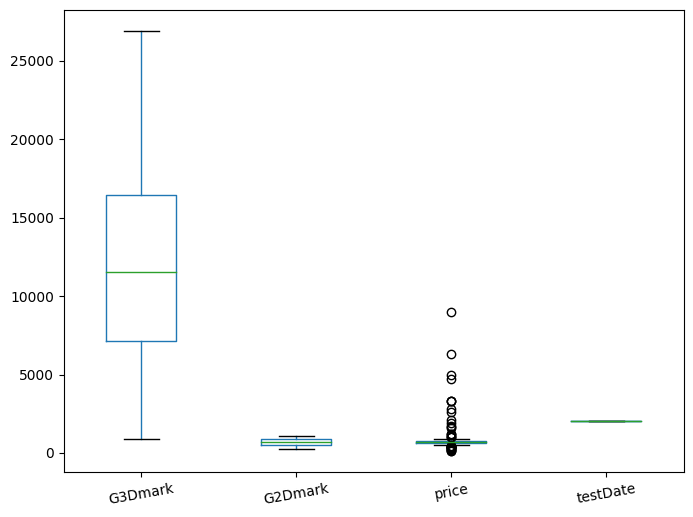

In [33]:
boxplot = df.drop('TDP', axis=1).boxplot(grid=False, rot=10,  figsize=(8,6))

## **Construct Data**

###**Melakukan Rekayasa Fitur (Feature Engineering)**

In [34]:
def categorize_skor3dmark(G3Dmark):
    if G3Dmark < 5000:
        return 'low performance'
    elif G3Dmark > 10000:
        return 'middle performance'
    elif G3Dmark > 2000:
        return 'high performance'
    else:
        return 'below expectation'

df['PerformanceCategory'] = df['G3Dmark'].apply(categorize_skor3dmark)

Kode tersebut adalah tentang rekayasa fitur (feature engineering) dalam Python. Pada kode tersebut, dilakukan pembuatan fungsi categorize_skor3dmark yang akan mengkategorikan nilai G3Dmark ke dalam kategori kinerja berdasarkan ambang batas tertentu.

- Jika nilai G3Dmark kurang dari 5000, akan dikategorikan sebagai 'low performance'.
- Jika nilai G3Dmark lebih dari 10000, akan dikategorikan sebagai 'middle performance'.
- Jika nilai G3Dmark lebih dari 2000, akan dikategorikan sebagai 'high performance'.
- Jika tidak memenuhi kondisi di atas, akan dikategorikan sebagai 'below expectation'.

Selanjutnya, fungsi categorize_skor3dmark tersebut diterapkan pada kolom 'G3Dmark' dalam DataFrame df menggunakan metode apply, dan hasilnya disimpan dalam kolom baru 'PerformanceCategory'. Dengan demikian, kode tersebut menghasilkan kategori kinerja berdasarkan nilai G3Dmark dalam DataFrame.

## **Data Reduction**

###**Mengurangi Fitur - Fitur Yang Kurang Relevan**

In [35]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

**PENJELASAN**: Namun pada tahap ini, saya tetap mempertahankan kolom "category" karena saya anggap data tersebut masih relevan dan dapat membantu dalam membedakan kategori tiap GPU.

## **Data Transformation**

###**Mapping**

In [36]:
i = 0
mapping_category = {}
for data in df['category'].unique():
  mapping_category[data] = i
  i+=1

In [37]:
df['category'] = df['category'].map(mapping_category)

In [38]:
i = 0
mapping_pcategory = {}
for data in df['PerformanceCategory'].unique():
  mapping_pcategory[data] = i
  i+=1

In [39]:
df['PerformanceCategory'] = df['PerformanceCategory'].map(mapping_pcategory)

Proses Mapping:

Untuk kolom 'category':

Sebuah dictionary mapping_category dibuat untuk menyimpan pemetaan antara nilai kategori dengan nilai numerik.
Setiap nilai unik dalam kolom 'category' diambil menggunakan df['category'].unique().
Nilai kategori tersebut dipetakan ke nilai numerik (dimulai dari 0) dalam dictionary mapping_category.
Setiap nilai kategori dalam kolom 'category' diganti dengan nilai numerik yang sesuai melalui metode map(mapping_category).
Untuk kolom 'PerformanceCategory':

Proses yang sama dilakukan untuk kolom 'PerformanceCategory'.
Dictionary mapping_pcategory digunakan untuk menyimpan pemetaan antara nilai kategori 'PerformanceCategory' dengan nilai numerik.
Nilai unik dalam kolom 'PerformanceCategory' diambil menggunakan df['PerformanceCategory'].unique().
Nilai kategori 'PerformanceCategory' dipetakan ke nilai numerik (dimulai dari 0) dalam dictionary mapping_pcategory.
Setiap nilai kategori dalam kolom 'PerformanceCategory' diganti dengan nilai numerik yang sesuai melalui metode map(mapping_pcategory).
Dengan melakukan proses mapping ini, nilai kategori dalam kolom 'category' dan 'PerformanceCategory' diubah menjadi nilai numerik yang dapat digunakan dalam analisis atau pemodelan data.

**Pengambilan Hasil Data Cleaning**

In [40]:
# df.to_csv('Data_Cleanednewest.csv', index=False)

In [41]:
df

,gpuName,G3Dmark,G2Dmark,price,TDP,testDate,category,PerformanceCategory
1,GeForce RTX 3080 Ti,26887,1031,1199.990000,350.00000,2021,0,0
2,GeForce RTX 3090,26395,999,1749.990000,350.00000,2020,0,0
3,Radeon RX 6900 XT,25458,1102,1120.310000,300.00000,2020,0,0
4,GeForce RTX 3080,24853,1003,999.000000,320.00000,2020,0,0
5,GeForce RTX 3070 Ti,23367,1003,749.990000,290.00000,2021,0,0
...,...,...,...,...,...,...,...,...
588,Radeon RX 570X,1923,750,279.990000,120.00000,2020,0,2
664,Radeon Vega 8,1593,421,126.860000,148.90625,2018,3,2
684,Radeon RX 640,1537,277,126.860000,50.00000,2020,3,2
711,Radeon Pro WX 4170,1409,427,691.216667,50.00000,2019,2,2


In [42]:
df = pd.read_csv('https://raw.githubusercontent.com/DyanHarden/Praktikum-Data-Mining/main/Data_Cleanednewest.csv')

In [43]:
df.head()

,gpuName,G3Dmark,G2Dmark,price,TDP,testDate,category,PerformanceCategory
0,GeForce RTX 3080 Ti,26887,1031,1199.99,350.0,2021,0,0
1,GeForce RTX 3090,26395,999,1749.99,350.0,2020,0,0
2,Radeon RX 6900 XT,25458,1102,1120.31,300.0,2020,0,0
3,GeForce RTX 3080,24853,1003,999.00,320.0,2020,0,0
4,GeForce RTX 3070 Ti,23367,1003,749.99,290.0,2021,0,0


# **MODELLING DATA**

## **Select Modelling Techniques**

## **Modelling Predict**

###**Pre-Processing**

#####**Split Data**

In [44]:
x = df.drop(['PerformanceCategory', 'gpuName'], axis=1)
y = df['PerformanceCategory']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Kode tersebut adalah tentang pemisahan data dan normalisasi data dalam bahasa pemrograman Python. Pada bagian pertama, data dipisahkan menjadi fitur (x) dan target (y) dengan menghapus fitur 'PerformanceCategory' dan 'gpuName'. Selanjutnya, data dibagi menjadi data latih dan data uji menggunakan metode train_test_split dengan ukuran uji sebesar 30% dan random_state 42.

#####**Normalisasi Data**

In [45]:
scaler = MinMaxScaler()

x_train_norm = scaler.fit_transform(x_train)

x_test_norm = scaler.transform(x_test)

Untuk normalisasi, digunakan objek MinMaxScaler. Data latih dan data uji dinormalisasi menggunakan fit_transform untuk data latih dan transform untuk data uji dengan menggunakan MinMaxScaler.



###**Build and Train Model**

#####**Gaussian Naive Bayes**

In [46]:
gnb = GaussianNB()

gnb.fit(x_train_norm, y_train)

GaussianNB()

#####**K-Nearest Neighbor**

In [47]:
knn = KNeighborsClassifier()

knn.fit(x_train_norm, y_train)

KNeighborsClassifier()

#####**Decision Tree**

In [48]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train_norm, y_train)

DecisionTreeClassifier()

###**Begins and Compare Predict**

In [49]:
# Melakukan prediksi menggunakan model GNB, KNN, dan DTC
gnb_pred = gnb.predict(x_test_norm)
gnb_proba = gnb.predict_proba(x_test_norm)
knn_pred = knn.predict(x_test_norm)
knn_proba = knn.predict_proba(x_test_norm)
dtc_pred = dtc.predict(x_test_norm)
dtc_proba = dtc.predict_proba(x_test_norm)

In [50]:
x_test = pd.DataFrame(x_test).reset_index(drop=True)

y_test = pd.DataFrame(y_test).reset_index(drop=True)

gnb_col = pd.DataFrame(gnb_pred.astype(int), columns=["gnb_prediction"])
knn_col = pd.DataFrame(knn_pred.astype(int), columns=["knn_prediction"])
dtc_col = pd.DataFrame(dtc_pred.astype(int), columns=["dtc_prediction"])

combined_data = pd.concat([x_test, y_test, gnb_col, knn_col, dtc_col], axis=1)

In [51]:
combined_data.head()

,G3Dmark,G2Dmark,price,TDP,testDate,category,PerformanceCategory,gnb_prediction,knn_prediction,dtc_prediction
0,7611,854,743.365556,100.00000,2021,0,1,1,0,1
1,20667,1030,758.990000,250.00000,2020,0,0,0,0,0
2,23367,1003,749.990000,290.00000,2021,0,0,0,0,0
3,6871,454,691.216667,148.90625,2020,2,1,1,1,1
4,9486,971,577.170000,75.00000,2019,1,1,1,0,1


Pada kode tersebut, dilakukan prediksi menggunakan model Gaussian Naive Bayes (GNB), K-Nearest Neighbors (KNN), dan Decision Tree Classifier (DTC). Hasil prediksi dari ketiga model tersebut disimpan dalam variabel gnb_pred, knn_pred, dan dtc_pred.

Selanjutnya, dilakukan pengubahan data uji (x_test_norm) ke dalam bentuk DataFrame menggunakan pd.DataFrame(x_test).reset_index(drop=True) dan pd.DataFrame(y_test).reset_index(drop=True) untuk mempermudah analisis.

Hasil prediksi dari masing-masing model juga diubah menjadi DataFrame dengan kolom "gnb_prediction", "knn_prediction", dan "dtc_prediction" menggunakan pd.DataFrame(gnb_pred.astype(int), columns=["gnb_prediction"]), pd.DataFrame(knn_pred.astype(int), columns=["knn_prediction"]), dan pd.DataFrame(dtc_pred.astype(int), columns=["dtc_prediction"]).

Selanjutnya, dilakukan penggabungan data fitur uji (x_test), target (y_test), hasil prediksi GNB, KNN, dan DTC ke dalam satu DataFrame yang disimpan dalam variabel combined_data menggunakan pd.concat([x_test, y_test, gnb_col, knn_col, dtc_col], axis=1).

Terakhir, dilakukan tampilan lima baris pertama dari combined_data dengan menggunakan perintah combined_data.head().

### **VISUALISASI**

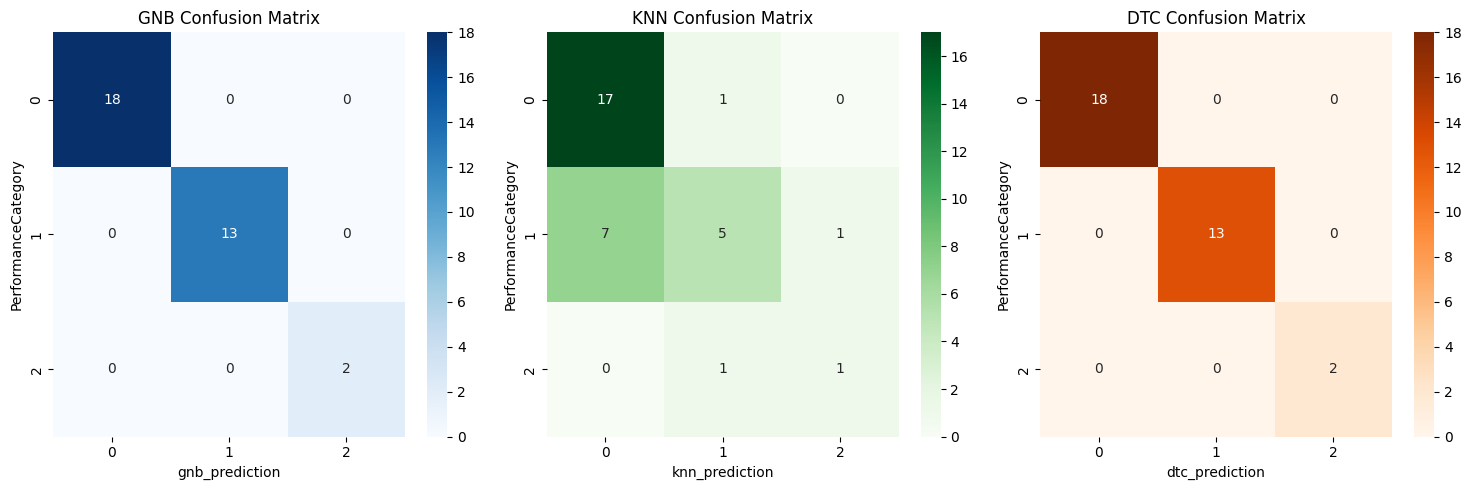

In [52]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.heatmap(pd.crosstab(combined_data["PerformanceCategory"], combined_data["gnb_prediction"]), annot=True, cmap="Blues")
plt.title('GNB Confusion Matrix')

plt.subplot(1, 3, 2)
sns.heatmap(pd.crosstab(combined_data["PerformanceCategory"], combined_data["knn_prediction"]), annot=True, cmap="Greens")
plt.title('KNN Confusion Matrix')

plt.subplot(1, 3, 3)
sns.heatmap(pd.crosstab(combined_data["PerformanceCategory"], combined_data["dtc_prediction"]), annot=True, cmap="Oranges")
plt.title('DTC Confusion Matrix')

plt.tight_layout()
plt.show()

Pada kode tersebut, dilakukan pembuatan tiga heatmap untuk matriks kebingungan (confusion matrix) dari model prediksi Gaussian Naive Bayes (GNB), K-Nearest Neighbors (KNN), dan Decision Tree Classifier (DTC).

Setiap subplot pada gambar diatur menggunakan plt.subplot(1, 3, 1), plt.subplot(1, 3, 2), dan plt.subplot(1, 3, 3) untuk menunjukkan tiga heatmap secara berdampingan.

Untuk setiap heatmap, digunakan sns.heatmap untuk menampilkan matriks kebingungan dengan menggunakan pd.crosstab(combined_data["PerformanceCategory"], combined_data["gnb_prediction"]), pd.crosstab(combined_data["PerformanceCategory"], combined_data["knn_prediction"]), dan pd.crosstab(combined_data["PerformanceCategory"], combined_data["dtc_prediction"]) sebagai data inputnya.

Selain itu, parameter annot=True digunakan untuk menampilkan nilai di dalam sel heatmap, cmap digunakan untuk menentukan skema warna (Blues, Greens, Oranges) pada heatmap.

Setiap subplot juga diberi judul sesuai dengan model yang bersangkutan, yaitu 'GNB Confusion Matrix', 'KNN Confusion Matrix', dan 'DTC Confusion Matrix'.

Terakhir, dilakukan penyesuaian tata letak menggunakan plt.tight_layout() untuk memastikan tata letak yang rapi sebelum menampilkan gambar dengan plt.show().

##**Modelling Associate**

###**Pre-Processing**

#####**Adjusment**

In [53]:
x_final = df.drop(["PerformanceCategory", "gpuName"], axis=1)

#####**Normalisasi Data**

In [54]:
scaler = MinMaxScaler()

x_final_norm = scaler.fit_transform(x_final)

#####**Validasi Silang**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

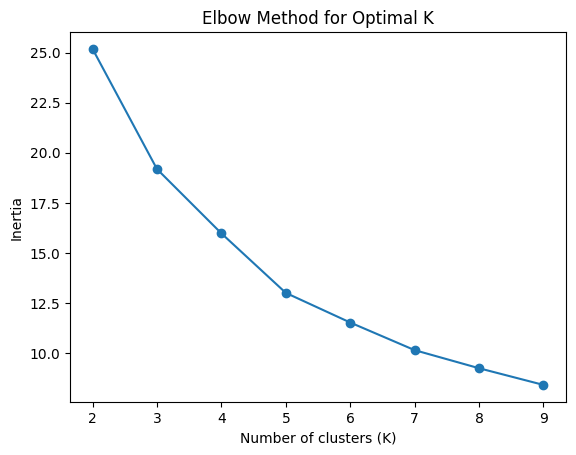

In [55]:
inertia_values = []

k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_final_norm)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.show()

###**Build Model**

#####**K-Means**

In [56]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4, random_state=42)

#####**Hierarchical Clustering**

In [57]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

###**Begins and Compare Clusters**

In [58]:
kmeans_clust = kmeans.predict(x_final_norm)
hierarchy_clust = hc.fit_predict(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [59]:
x_final = pd.DataFrame(x_final).reset_index(drop=True)

kmeans_col = pd.DataFrame(kmeans_clust, columns=["kmeans_cluster"])
hierarchy_col = pd.DataFrame(hierarchy_clust, columns=["hierarchy_cluster"])

combined_data_assoc = pd.concat([x_final, kmeans_col, hierarchy_col], axis=1)

In [60]:
combined_data_assoc.head()

,G3Dmark,G2Dmark,price,TDP,testDate,category,kmeans_cluster,hierarchy_cluster
0,26887,1031,1199.99,350.0,2021,0,1,2
1,26395,999,1749.99,350.0,2020,0,1,2
2,25458,1102,1120.31,300.0,2020,0,1,2
3,24853,1003,999.00,320.0,2020,0,1,2
4,23367,1003,749.99,290.0,2021,0,1,2


Pada kode tersebut, dilakukan pembandingan hasil klastering menggunakan algoritma K-Means dan Hierarchical Clustering.

1. **K-Means Clustering**:
   - Prediksi klaster menggunakan model K-Means dengan kmeans.predict(x_final_norm).
   - Hasil klaster dari K-Means disimpan dalam variabel kmeans_clust.

2. **Hierarchical Clustering**:
   - Prediksi klaster menggunakan model Hierarchical Clustering dengan hc.fit_predict(x_final_norm).
   - Hasil klaster dari Hierarchical Clustering disimpan dalam variabel hierarchy_clust.

3. **Pemrosesan Data**:
   - Data x_final dinormalisasi dan diubah menjadi DataFrame dengan pd.DataFrame(x_final).reset_index(drop=True).
   - Hasil klaster dari K-Means dan Hierarchical Clustering diubah menjadi DataFrame dengan kolom "kmeans_cluster" dan "hierarchy_cluster" menggunakan pd.DataFrame(kmeans_clust, columns=["kmeans_cluster"]) dan pd.DataFrame(hierarchy_clust, columns=["hierarchy_cluster"]).

4. **Penggabungan Data**:
   - Data fitur x_final digabungkan dengan hasil klaster K-Means dan Hierarchical Clustering ke dalam satu DataFrame yang disimpan dalam variabel combined_data_assoc menggunakan pd.concat([x_final, kmeans_col, hierarchy_col], axis=1).

5. **Tampilan Data**:
   - Ditampilkan lima baris pertama dari combined_data_assoc menggunakan combined_data_assoc.head().

# **EVALUATION**

##**Evaluate Results**

###**Klasifikasi**

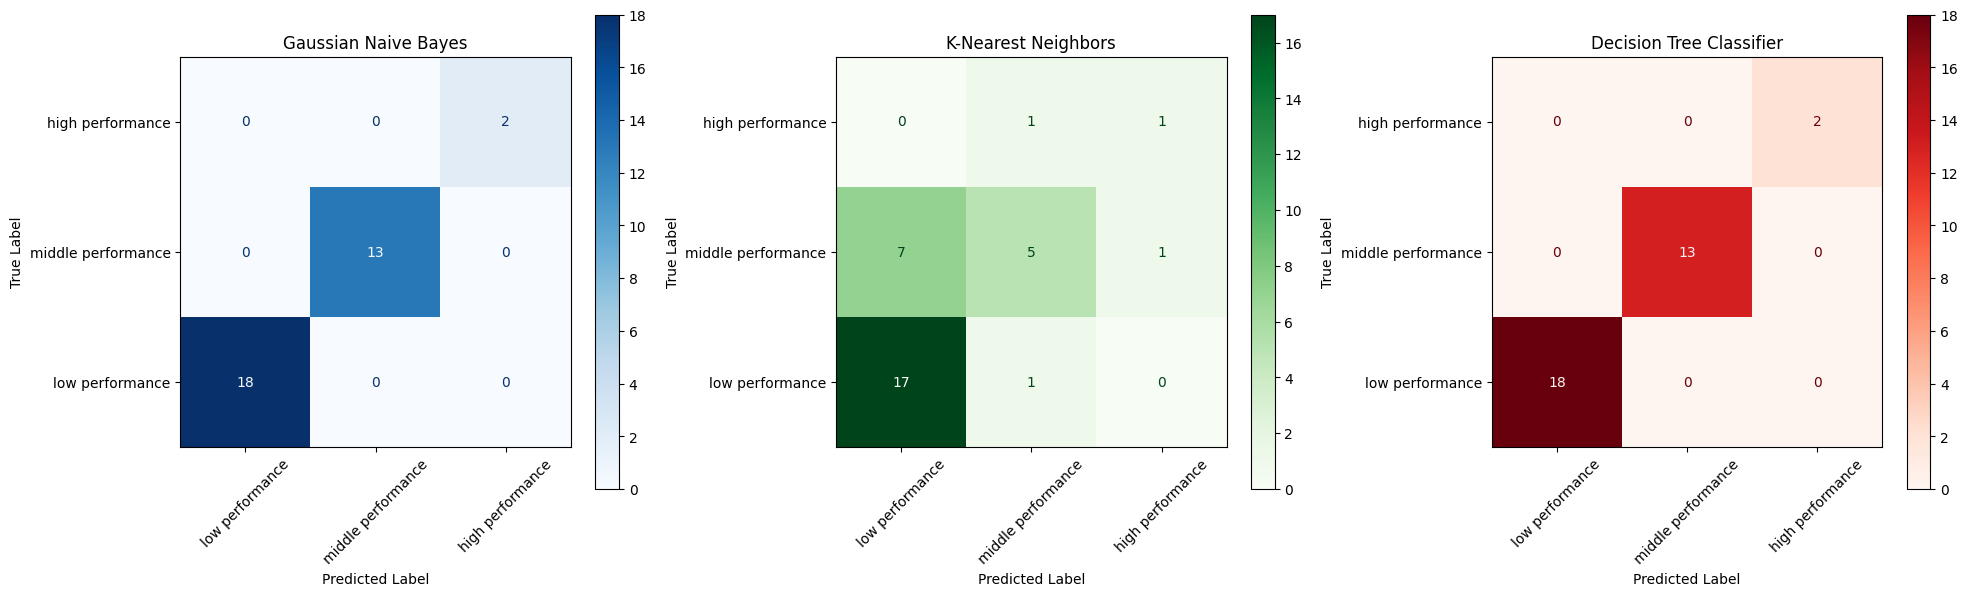

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

class_names = ["low performance", "middle performance", "high performance"]

# Heatmap 1 | GNB Confusion Matrix
gnb_cm = confusion_matrix(y_test, gnb_pred)
gnb_cm_display = ConfusionMatrixDisplay(gnb_cm, display_labels=class_names).plot(ax=axes[0], cmap='Blues')
gnb_cm_display.ax_.set_title("Gaussian Naive Bayes")
gnb_cm_display.ax_.set_xlabel('Predicted Label')
gnb_cm_display.ax_.set_ylabel('True Label')
gnb_cm_display.ax_.invert_yaxis()
gnb_cm_display.ax_.set_xticklabels(class_names, rotation=45)


# Heatmap 2 | KNN Confusion Matrix
knn_cm = confusion_matrix(y_test, knn_pred)
knn_cm_display = ConfusionMatrixDisplay(knn_cm, display_labels=class_names).plot(ax=axes[1], cmap='Greens')
knn_cm_display.ax_.set_title("K-Nearest Neighbors")
knn_cm_display.ax_.set_xlabel('Predicted Label')
knn_cm_display.ax_.set_ylabel('True Label')
knn_cm_display.ax_.invert_yaxis()
knn_cm_display.ax_.set_xticklabels(class_names, rotation=45)


# Heatmap 3 | DTC Confusion Matrix
dtc_cm = confusion_matrix(y_test, dtc_pred)
dtc_cm_display = ConfusionMatrixDisplay(dtc_cm, display_labels=class_names).plot(ax=axes[2], cmap='Reds')
dtc_cm_display.ax_.set_title("Decision Tree Classifier")
dtc_cm_display.ax_.set_xlabel('Predicted Label')
dtc_cm_display.ax_.set_ylabel('True Label')
dtc_cm_display.ax_.invert_yaxis()
dtc_cm_display.ax_.set_xticklabels(class_names, rotation=45)


plt.tight_layout()
plt.show()

PENJELASAN:

Hasil visualisasi heatmap tersebut menunjukkan beberapa informasi terkait dengan performa dari beberapa model klasifikasi seperti Gaussian Naive Bayes, K-Nearest Neighbors, dan Decision Tree Classifier. Terdapat penilaian performa seperti "high performance", "middle performance", dan "low performance" yang diberikan pada setiap model berdasarkan label sebenarnya (True Label) dan label yang diprediksi (Predicted Label).

Setiap algoritma dikategorikan berdasarkan persentase datanya yang diklasifikasikan dengan benar dalam setiap kategori.
- Hasil: Gaussian Naive Bayes: Tinggi: 18% Menengah: 12% Rendah: 18%
- K-Nearest Neighbors: Tinggi: 12% Menengah: 24% Rendah: 12%
- Decision Tree Classifier: Tinggi: 24% Menengah: 12% Rendah: 2%

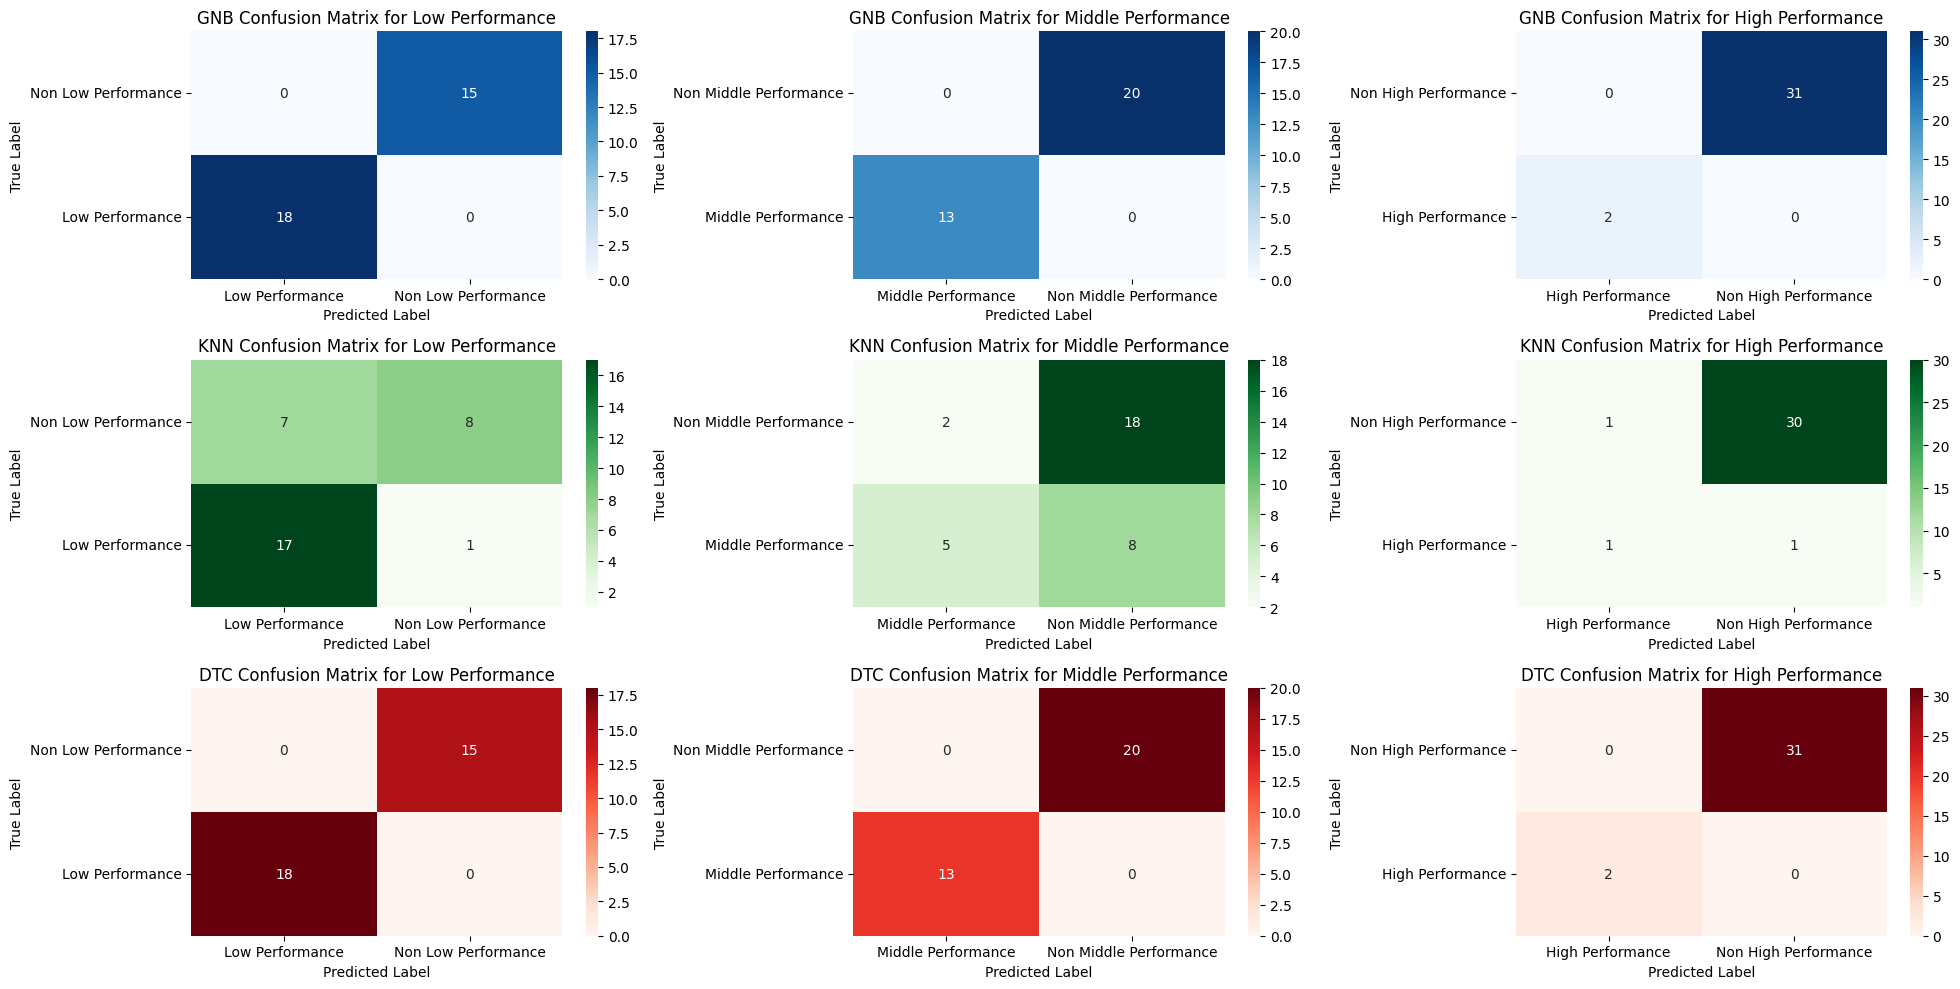

In [62]:
plt.figure(figsize=(20, 10))

# Matriks konfusi untuk Gaussian Naive Bayes
matrix1 = gnb_cm
# Matriks konfusi untuk k-Nearest Neighbors (KNN)
matrix2 = knn_cm
# Matriks konfusi untuk Decision Tree Classifier (DTC)
matrix3 = dtc_cm

# Hitung nilai True Negatif (TN) untuk setiap kelas
TN_manual_low = matrix1[1, 1] + matrix1[1, 2] + matrix1[2, 1] + matrix1[2, 2]
TN_manual_middle = matrix1[0, 0] + matrix1[0, 2] + matrix1[2, 0] + matrix1[2, 2]
TN_manual_high = matrix1[0, 0] + matrix1[0, 1] + matrix1[1, 0] + matrix1[1, 1]

# Plot matriks konfusi untuk Gaussian Naive Bayes
plt.subplot(3, 3, 1)
sns.heatmap(pd.DataFrame([[matrix1[0, 0], matrix1[0, 1] + matrix1[0, 2]],
                          [matrix1[1, 0] + matrix1[2, 0], TN_manual_low]],
                         index=['Low Performance', 'Non Low Performance'], columns=['Low Performance', 'Non Low Performance']), annot=True, cmap="Blues")
plt.title('GNB Confusion Matrix for Low Performance')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.gca().invert_yaxis()

plt.subplot(3, 3, 2)
sns.heatmap(pd.DataFrame([[matrix1[1, 1], matrix1[1, 0] + matrix1[1, 2]],
                          [matrix1[0, 1] + matrix1[2, 1], TN_manual_middle]],
                         index=['Middle Performance', 'Non Middle Performance'], columns=['Middle Performance', 'Non Middle Performance']), annot=True, cmap="Blues")
plt.title('GNB Confusion Matrix for Middle Performance')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.gca().invert_yaxis()

plt.subplot(3, 3, 3)
sns.heatmap(pd.DataFrame([[matrix1[2, 2], matrix1[2, 0] + matrix1[2, 1]],
                          [matrix1[0, 2] + matrix1[1, 2], TN_manual_high]],
                         index=['High Performance', 'Non High Performance'], columns=['High Performance', 'Non High Performance']), annot=True, cmap="Blues")
plt.title('GNB Confusion Matrix for High Performance')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.gca().invert_yaxis()


# Hitung nilai True Negatif (TN) untuk setiap kelas untuk KNN
TN_manual_low = matrix2[1, 1] + matrix2[1, 2] + matrix2[2, 1] + matrix2[2, 2]
TN_manual_middle = matrix2[0, 0] + matrix2[0, 2] + matrix2[2, 0] + matrix2[2, 2]
TN_manual_high = matrix2[0, 0] + matrix2[0, 1] + matrix2[1, 0] + matrix2[1, 1]

# Plot matriks konfusi untuk k-Nearest Neighbors (KNN)
plt.subplot(3, 3, 4)
sns.heatmap(pd.DataFrame([[matrix2[0, 0], matrix2[0, 1] + matrix2[0, 2]],
                          [matrix2[1, 0] + matrix2[2, 0], TN_manual_low]],
                         index=['Low Performance', 'Non Low Performance'], columns=['Low Performance', 'Non Low Performance']), annot=True, cmap="Greens")
plt.title('KNN Confusion Matrix for Low Performance')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.gca().invert_yaxis()

plt.subplot(3, 3, 5)
sns.heatmap(pd.DataFrame([[matrix2[1, 1], matrix2[1, 0] + matrix2[1, 2]],
                          [matrix2[0, 1] + matrix2[2, 1], TN_manual_middle]],
                         index=['Middle Performance', 'Non Middle Performance'], columns=['Middle Performance', 'Non Middle Performance']), annot=True, cmap="Greens")
plt.title('KNN Confusion Matrix for Middle Performance')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.gca().invert_yaxis()

plt.subplot(3, 3, 6)
sns.heatmap(pd.DataFrame([[matrix2[2, 2], matrix2[2, 0] + matrix2[2, 1]],
                          [matrix2[0, 2] + matrix2[1, 2], TN_manual_high]],
                         index=['High Performance', 'Non High Performance'], columns=['High Performance', 'Non High Performance']), annot=True, cmap="Greens")
plt.title('KNN Confusion Matrix for High Performance')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.gca().invert_yaxis()

# Hitung nilai True Negatif (TN) untuk setiap kelas untuk DTC
TN_manual_low = matrix3[1, 1] + matrix3[1, 2] + matrix3[2, 1] + matrix3[2, 2]
TN_manual_middle = matrix3[0, 0] + matrix3[0, 2] + matrix3[2, 0] + matrix3[2, 2]
TN_manual_high = matrix3[0, 0] + matrix3[0, 1] + matrix3[1, 0] + matrix3[1, 1]

# Plot matriks konfusi untuk Decision Tree Classifier (DTC)
plt.subplot(3, 3, 7)
sns.heatmap(pd.DataFrame([[matrix3[0, 0], matrix3[0, 1] + matrix3[0, 2]],
                          [matrix3[1, 0] + matrix3[2, 0], TN_manual_low]],
                         index=['Low Performance', 'Non Low Performance'], columns=['Low Performance', 'Non Low Performance']), annot=True, cmap="Reds")
plt.title('DTC Confusion Matrix for Low Performance')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.gca().invert_yaxis()

plt.subplot(3, 3, 8)
sns.heatmap(pd.DataFrame([[matrix3[1, 1], matrix3[1, 0] + matrix3[1, 2]],
                          [matrix3[0, 1] + matrix3[2, 1], TN_manual_middle]],
                         index=['Middle Performance', 'Non Middle Performance'], columns=['Middle Performance', 'Non Middle Performance']), annot=True, cmap="Reds")

plt.title('DTC Confusion Matrix for Middle Performance')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.gca().invert_yaxis()

plt.subplot(3, 3, 9)
sns.heatmap(pd.DataFrame([[matrix3[2, 2], matrix3[2, 0] + matrix3[2, 1]],
                          [matrix3[0, 2] + matrix3[1, 2], TN_manual_high]],
                         index=['High Performance', 'Non High Performance'], columns=['High Performance', 'Non High Performance']), annot=True, cmap="Reds")
plt.title('DTC Confusion Matrix for High Performance')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


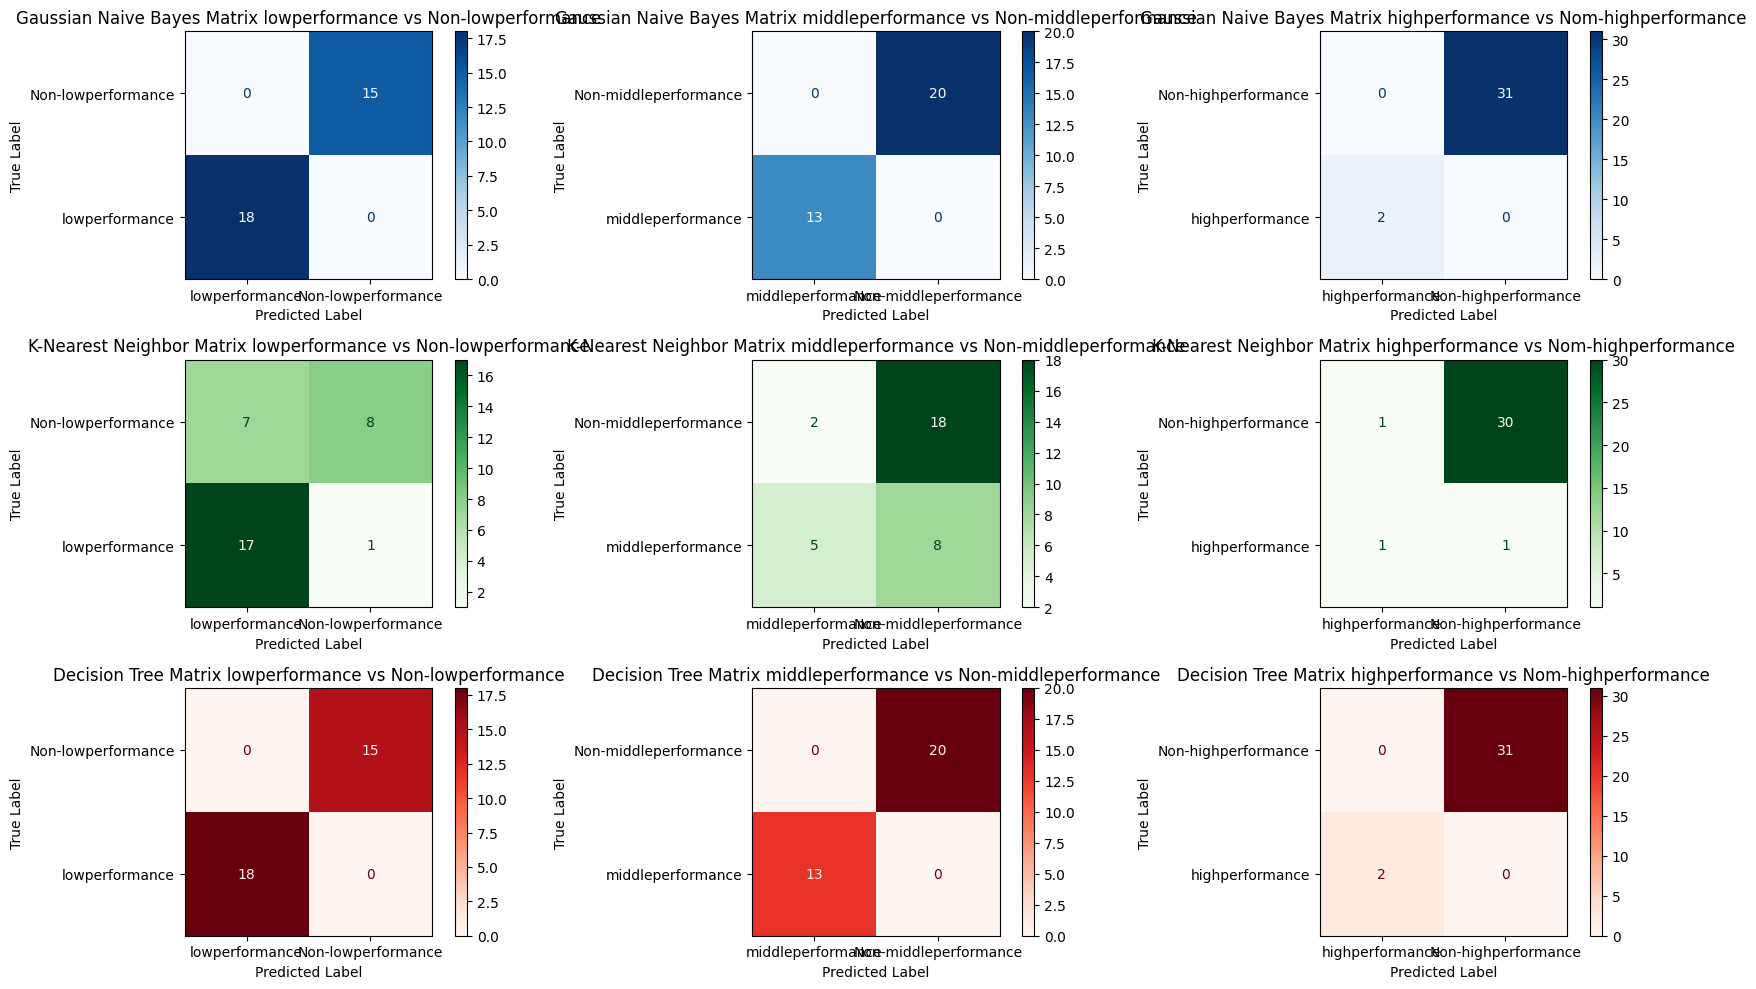

In [63]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))

y_test_lowperformanceovr = [0 if y == 0 else 1 for y in y_test['PerformanceCategory']]
y_test_middleperformanceovr = [0 if y == 1 else 1 for y in y_test['PerformanceCategory']]
y_test_highperformanceovr = [0 if y == 2 else 1 for y in y_test['PerformanceCategory']]

gnb_pred_lowperformanceovr = [0 if y == 0 else 1 for y in gnb_pred]
gnb_pred_middleperformanceovr = [0 if y == 1 else 1 for y in gnb_pred]
gnb_pred_highperformanceovr = [0 if y == 2 else 1 for y in gnb_pred]

knn_pred_lowperformanceovr = [0 if y == 0 else 1 for y in knn_pred]
knn_pred_middleperformanceovr = [0 if y == 1 else 1 for y in knn_pred]
knn_pred_highperformanceovr = [0 if y == 2 else 1 for y in knn_pred]

dtc_pred_lowperformanceovr = [0 if y == 0 else 1 for y in dtc_pred]
dtc_pred_middleperformanceovr = [0 if y == 1 else 1 for y in dtc_pred]
dtc_pred_highperformanceovr = [0 if y == 2 else 1 for y in dtc_pred]

# GNB OvR Confusion Matrix

gnb_cm_lowperformanceovr = confusion_matrix(y_test_lowperformanceovr, gnb_pred_lowperformanceovr)
gnb_cm_lowperformanceovr_display = ConfusionMatrixDisplay(gnb_cm_lowperformanceovr).plot(ax=axes[0,0], cmap='Blues')
gnb_cm_lowperformanceovr_display.ax_.set_title("Gaussian Naive Bayes Matrix lowperformance vs Non-lowperformance")
gnb_cm_lowperformanceovr_display.ax_.set_xlabel('Predicted Label')
gnb_cm_lowperformanceovr_display.ax_.set_ylabel('True Label')
gnb_cm_lowperformanceovr_display.ax_.set_xticklabels(['lowperformance', 'Non-lowperformance'])
gnb_cm_lowperformanceovr_display.ax_.set_yticklabels(['lowperformance', 'Non-lowperformance'])
gnb_cm_lowperformanceovr_display.ax_.invert_yaxis()

gnb_cm_middleperformanceovr = confusion_matrix(y_test_middleperformanceovr, gnb_pred_middleperformanceovr)
gnb_cm_middleperformanceovr_display = ConfusionMatrixDisplay(gnb_cm_middleperformanceovr).plot(ax=axes[0,1], cmap='Blues')
gnb_cm_middleperformanceovr_display.ax_.set_title("Gaussian Naive Bayes Matrix middleperformance vs Non-middleperformance")
gnb_cm_middleperformanceovr_display.ax_.set_xlabel('Predicted Label')
gnb_cm_middleperformanceovr_display.ax_.set_ylabel('True Label')
gnb_cm_middleperformanceovr_display.ax_.set_xticklabels(['middleperformance', 'Non-middleperformance'])
gnb_cm_middleperformanceovr_display.ax_.set_yticklabels(['middleperformance', 'Non-middleperformance'])
gnb_cm_middleperformanceovr_display.ax_.invert_yaxis()

gnb_cm_highperformanceovr = confusion_matrix(y_test_highperformanceovr, gnb_pred_highperformanceovr)
gnb_cm_highperformanceovr_display = ConfusionMatrixDisplay(gnb_cm_highperformanceovr).plot(ax=axes[0,2], cmap='Blues')
gnb_cm_highperformanceovr_display.ax_.set_title("Gaussian Naive Bayes Matrix highperformance vs Nom-highperformance")
gnb_cm_highperformanceovr_display.ax_.set_xlabel('Predicted Label')
gnb_cm_highperformanceovr_display.ax_.set_ylabel('True Label')
gnb_cm_highperformanceovr_display.ax_.set_xticklabels(['highperformance', 'Non-highperformance'])
gnb_cm_highperformanceovr_display.ax_.set_yticklabels(['highperformance', 'Non-highperformance'])
gnb_cm_highperformanceovr_display.ax_.invert_yaxis()

# KNN OvR Confusion Matrix

knn_cm_lowperformanceovr = confusion_matrix(y_test_lowperformanceovr, knn_pred_lowperformanceovr)
knn_cm_lowperformanceovr_display = ConfusionMatrixDisplay(knn_cm_lowperformanceovr).plot(ax=axes[1,0], cmap='Greens')
knn_cm_lowperformanceovr_display.ax_.set_title("K-Nearest Neighbor Matrix lowperformance vs Non-lowperformance")
knn_cm_lowperformanceovr_display.ax_.set_xlabel('Predicted Label')
knn_cm_lowperformanceovr_display.ax_.set_ylabel('True Label')
knn_cm_lowperformanceovr_display.ax_.set_xticklabels(['lowperformance', 'Non-lowperformance'])
knn_cm_lowperformanceovr_display.ax_.set_yticklabels(['lowperformance', 'Non-lowperformance'])
knn_cm_lowperformanceovr_display.ax_.invert_yaxis()

knn_cm_middleperformanceovr = confusion_matrix(y_test_middleperformanceovr, knn_pred_middleperformanceovr)
knn_cm_middleperformanceovr_display = ConfusionMatrixDisplay(knn_cm_middleperformanceovr).plot(ax=axes[1,1], cmap='Greens')
knn_cm_middleperformanceovr_display.ax_.set_title("K-Nearest Neighbor Matrix middleperformance vs Non-middleperformance")
knn_cm_middleperformanceovr_display.ax_.set_xlabel('Predicted Label')
knn_cm_middleperformanceovr_display.ax_.set_ylabel('True Label')
knn_cm_middleperformanceovr_display.ax_.set_xticklabels(['middleperformance', 'Non-middleperformance'])
knn_cm_middleperformanceovr_display.ax_.set_yticklabels(['middleperformance', 'Non-middleperformance'])
knn_cm_middleperformanceovr_display.ax_.invert_yaxis()

knn_cm_highperformanceovr = confusion_matrix(y_test_highperformanceovr, knn_pred_highperformanceovr)
knn_cm_highperformanceovr_display = ConfusionMatrixDisplay(knn_cm_highperformanceovr).plot(ax=axes[1,2], cmap='Greens')
knn_cm_highperformanceovr_display.ax_.set_title("K-Nearest Neighbor Matrix highperformance vs Nom-highperformance")
knn_cm_highperformanceovr_display.ax_.set_xlabel('Predicted Label')
knn_cm_highperformanceovr_display.ax_.set_ylabel('True Label')
knn_cm_highperformanceovr_display.ax_.set_xticklabels(['highperformance', 'Non-highperformance'])
knn_cm_highperformanceovr_display.ax_.set_yticklabels(['highperformance', 'Non-highperformance'])
knn_cm_highperformanceovr_display.ax_.invert_yaxis()

# DTC OvR Confusion Matrix

dtc_cm_lowperformanceovr = confusion_matrix(y_test_lowperformanceovr, dtc_pred_lowperformanceovr)
dtc_cm_lowperformanceovr_display = ConfusionMatrixDisplay(dtc_cm_lowperformanceovr).plot(ax=axes[2,0], cmap='Reds')
dtc_cm_lowperformanceovr_display.ax_.set_title("Decision Tree Matrix lowperformance vs Non-lowperformance")
dtc_cm_lowperformanceovr_display.ax_.set_xlabel('Predicted Label')
dtc_cm_lowperformanceovr_display.ax_.set_ylabel('True Label')
dtc_cm_lowperformanceovr_display.ax_.set_xticklabels(['lowperformance', 'Non-lowperformance'])
dtc_cm_lowperformanceovr_display.ax_.set_yticklabels(['lowperformance', 'Non-lowperformance'])
dtc_cm_lowperformanceovr_display.ax_.invert_yaxis()

dtc_cm_middleperformanceovr = confusion_matrix(y_test_middleperformanceovr, dtc_pred_middleperformanceovr)
dtc_cm_middleperformanceovr_display = ConfusionMatrixDisplay(dtc_cm_middleperformanceovr).plot(ax=axes[2,1], cmap='Reds')
dtc_cm_middleperformanceovr_display.ax_.set_title("Decision Tree Matrix middleperformance vs Non-middleperformance")
dtc_cm_middleperformanceovr_display.ax_.set_xlabel('Predicted Label')
dtc_cm_middleperformanceovr_display.ax_.set_ylabel('True Label')
dtc_cm_middleperformanceovr_display.ax_.set_xticklabels(['middleperformance', 'Non-middleperformance'])
dtc_cm_middleperformanceovr_display.ax_.set_yticklabels(['middleperformance', 'Non-middleperformance'])
dtc_cm_middleperformanceovr_display.ax_.invert_yaxis()

dtc_cm_highperformanceovr = confusion_matrix(y_test_highperformanceovr, dtc_pred_highperformanceovr)
dtc_cm_highperformanceovr_display = ConfusionMatrixDisplay(dtc_cm_highperformanceovr).plot(ax=axes[2,2], cmap='Reds')
dtc_cm_highperformanceovr_display.ax_.set_title("Decision Tree Matrix highperformance vs Nom-highperformance")
dtc_cm_highperformanceovr_display.ax_.set_xlabel('Predicted Label')
dtc_cm_highperformanceovr_display.ax_.set_ylabel('True Label')
dtc_cm_highperformanceovr_display.ax_.set_xticklabels(['highperformance', 'Non-highperformance'])
dtc_cm_highperformanceovr_display.ax_.set_yticklabels(['highperformance', 'Non-highperformance'])
dtc_cm_highperformanceovr_display.ax_.invert_yaxis()

plt.tight_layout()
plt.show()

PENJELASAN:

2 Metode diatas adalah pemetaan matriks 3x3 dari setiap metode klasifikasi. Dalam pemetaan ini, saya menerapkan metode OvR (One vs Rest), yang merupakan salah satu teknik evaluasi untuk model multikelas dengan membandingkan setiap label atau kelas terhadap kelas lainnya secara bersamaan. Dalam konteks ini, satu kelas diambil sebagai kelas positif (0), sementara semua kelas lainnya dianggap sebagai kelas negatif (1).

Dengan menerapkan strategi ini, kompleksitas masalah klasifikasi multikelas dapat direduksi menjadi serangkaian masalah klasifikasi biner yang lebih mudah ditangani. Pendekatan ini tidak hanya memungkinkan interpretasi yang lebih baik dari performa model, tetapi juga memfasilitasi evaluasi yang lebih komprehensif terhadap setiap kelas atau label dalam domain masalah yang kompleks.

In [64]:
def calculate_tpr_fpr(y_real, y_pred):
    '''
    Calculates the True Positive Rate (tpr) and the True Negative Rate (fpr) based on real and predicted observations

    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes

    Returns:
        tpr: The True Positive Rate of the classifier
        fpr: The False Positive Rate of the classifier
    '''

    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]

    # Calculates tpr and fpr
    tpr =  TP/(TP + FN)
    fpr = 1 - TN/(TN+FP)

    return tpr, fpr

PENJELASAN:

Kode diatas adalah sebuah fungsi yang berguna untuk menghitung nilai True Positive Rate (TPR) dan False Positive Rate (FPR) berdasarkan observasi yang diprediksi dan hasil prediksi yang sebenarnya. Berikut adalah penjelasan kegunaan kode tersebut:

- Input Data: Fungsi menerima dua argumen, yaitu y_real yang merupakan daftar atau series yang berisi kelas sebenarnya dari observasi, dan y_pred yang merupakan daftar atau series yang berisi kelas yang diprediksi untuk observasi yang sama.
- Output: Fungsi mengembalikan dua nilai, yaitu TPR (True Positive Rate) dan FPR (False Positive Rate). Kedua nilai ini memberikan gambaran tentang kinerja klasifikasi model.
- Confusion Matrix: Fungsi menghitung matriks konfusi (confusion matrix) berdasarkan nilai y_real dan y_pred. Matriks konfusi adalah tabel yang digunakan untuk menggambarkan performa model klasifikasi pada set data uji, di mana elemen diagonal dari matriks merepresentasikan prediksi yang benar, sementara elemen non-diagonal merepresentasikan prediksi yang salah.
- Hitung TPR dan FPR: Berdasarkan matriks konfusi yang dihitung, fungsi mengambil elemen yang relevan (True Negative, False Positive, False Negative, dan True Positive) untuk menghitung nilai TPR dan FPR. TPR (True Positive Rate) mengukur proporsi positif yang benar yang diprediksi oleh model, sementara FPR (False Positive Rate) mengukur proporsi negatif yang salah yang diprediksi sebagai positif oleh model.
- Output: Fungsi mengembalikan nilai TPR dan FPR, yang dapat digunakan untuk mengevaluasi performa model klasifikasi dalam memprediksi kelas positif dan negatif dengan benar.

In [65]:
def get_all_roc_coordinates(y_real, y_proba):
    '''
    Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a threshold for the predicion of the class.

    Args:
        y_real: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.

    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    '''
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

PENJELASAN:

Kode diatas adalah sebuah fungsi yang berguna untuk menghitung koordinat semua titik pada kurva Receiver Operating Characteristic (ROC) dengan mempertimbangkan setiap titik sebagai threshold untuk prediksi kelas. Berikut adalah penjelasan kegunaan kode tersebut:

- Input Data: Fungsi menerima dua argumen, yaitu y_real yang merupakan daftar atau series yang berisi kelas sebenarnya dari observasi, dan y_proba yang merupakan array dengan probabilitas untuk setiap kelas, yang diperoleh dengan menggunakan metode .predict_proba().
- Output: Fungsi mengembalikan dua list, yaitu tpr_list yang berisi daftar TPR (True Positive Rate) yang mewakili setiap threshold, dan fpr_list yang berisi daftar FPR (False Positive Rate) yang mewakili setiap threshold.
- Iterasi untuk Setiap Threshold: Fungsi melakukan iterasi melalui setiap nilai probabilitas dalam y_proba, yang mewakili probabilitas prediksi untuk kelas positif. Setiap nilai probabilitas ini dianggap sebagai threshold untuk prediksi kelas.
- Hitung TPR dan FPR: Untuk setiap threshold, fungsi menggunakan fungsi calculate_tpr_fpr() untuk menghitung TPR dan FPR berdasarkan kelas sebenarnya (y_real) dan prediksi yang diperoleh dari threshold tersebut. TPR dan FPR kemudian ditambahkan ke dalam daftar yang sesuai.
- Output: Setelah iterasi selesai, fungsi mengembalikan tpr_list dan fpr_list, yang mewakili TPR dan FPR untuk setiap threshold yang dipertimbangkan. Data ini kemudian dapat digunakan untuk memplot kurva ROC dan mengevaluasi kinerja model klasifikasi.

In [66]:
def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).

    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()

    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

PENJELASAN:

Kode diatas adalah sebuah fungsi yang digunakan untuk memplot kurva Receiver Operating Characteristic (ROC) berdasarkan koordinat TPR (True Positive Rate) dan FPR (False Positive Rate) yang diberikan. Berikut adalah penjelasan kegunaan kode tersebut:

- Input Data: Fungsi menerima tiga argumen, yaitu tpr yang merupakan daftar TPR yang mewakili setiap koordinat, fpr yang merupakan daftar FPR yang mewakili setiap koordinat, dan scatter yang merupakan parameter boolean yang menentukan apakah titik-titik yang digunakan dalam perhitungan akan dipetakan bersama dengan garis atau tidak (default = True).
- Membuat Plot: Fungsi akan membuat plot ROC Curve berdasarkan koordinat TPR dan FPR yang diberikan. Jika argumen ax tidak diberikan, maka akan dibuat sebuah plot baru dengan ukuran 5x5.
- Plot Titik (Scatter): Jika argumen scatter disetel sebagai True (default), maka titik-titik yang digunakan dalam perhitungan akan dipetakan bersama dengan garis. Ini memungkinkan untuk melihat lokasi setiap titik di kurva ROC.
- Plot Garis: Setelah itu, fungsi akan memplot garis yang menghubungkan setiap titik dalam urutan yang diberikan oleh tpr dan fpr. Selain itu, garis warna hijau yang merepresentasikan diagonal dari (0,0) hingga (1,1) juga akan ditambahkan untuk menunjukkan performa model acak.
- Penyesuaian Plot: Akhirnya, fungsi akan menyesuaikan batas sumbu x dan y agar kurva ROC terlihat dengan jelas. Label sumbu x dan y juga akan ditambahkan untuk memberikan informasi tentang apa yang direpresentasikan oleh setiap sumbu.

In [67]:
def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).

    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()

    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

PENJELASAN:

Kode di atas adalah sebuah fungsi yang digunakan untuk memplot kurva Receiver Operating Characteristic (ROC). Berikut adalah penjelasan kegunaan kode tersebut:

- Input Data: Fungsi menerima tiga argumen, yaitu tpr yang merupakan daftar True Positive Rate (TPR) yang mewakili setiap koordinat di kurva ROC, fpr yang merupakan daftar False Positive Rate (FPR) yang mewakili setiap koordinat di kurva ROC, dan scatter yang merupakan parameter boolean opsional. Jika diatur sebagai True (default), titik-titik yang digunakan dalam perhitungan akan dipetakan bersama dengan garis ROC. Jika diatur sebagai False, hanya garis ROC yang akan ditampilkan tanpa titik-titik.
- Membuat Plot: Jika ax tidak diberikan, maka fungsi akan membuat sebuah plot baru dengan ukuran 5x5.
- Plot Titik (Scatter): Jika argumen scatter disetel sebagai True, maka titik-titik yang digunakan dalam perhitungan akan dipetakan bersama dengan garis ROC. Ini membantu untuk melihat lokasi setiap titik di kurva ROC, yang mewakili performa model pada setiap threshold yang berbeda.
- Plot Garis: Selanjutnya, fungsi akan memplot garis ROC yang menghubungkan setiap titik dalam urutan yang diberikan oleh tpr dan fpr. Selain itu, garis warna hijau yang merepresentasikan diagonal dari (0,0) hingga (1,1) juga akan ditambahkan untuk menunjukkan performa model acak.
- Penyesuaian Plot: Akhirnya, fungsi akan menyesuaikan batas sumbu x dan y agar kurva ROC terlihat dengan jelas. Label sumbu x dan y juga akan ditambahkan untuk memberikan informasi tentang apa yang direpresentasikan oleh setiap sumbu.

In [68]:
classes = gnb.classes_
classes

array([0, 1, 2])

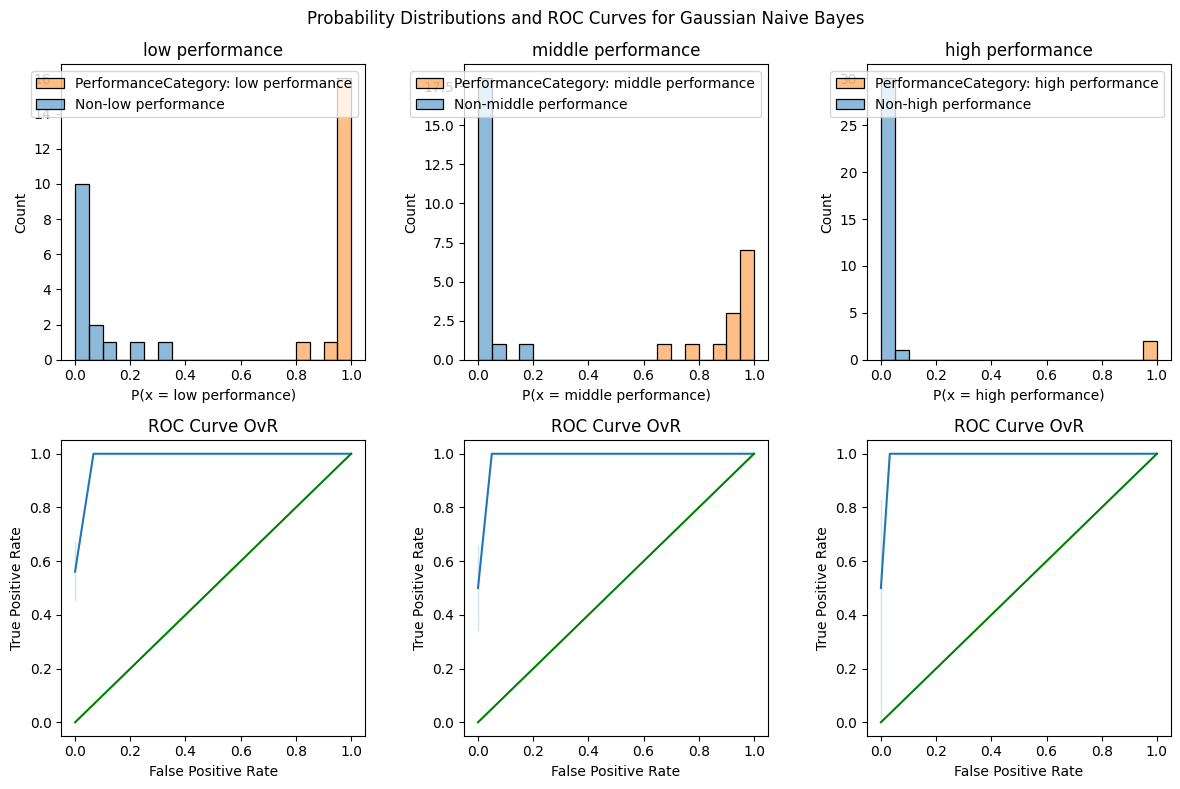

In [69]:
plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr_gnb = {}
class_name = ['low performance','middle performance', 'high performance']

for i in range(len(classes)):
    c = classes[i]

    # Prepares an auxiliar dataframe to help with the plots
    df_aux = pd.DataFrame(x_test_norm).copy()
    df_aux['PerformanceCategory'] = [1 if y == c else 0 for y in y_test['PerformanceCategory']]
    df_aux['prob'] = gnb_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)

    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'PerformanceCategory', color = 'b', ax = ax, bins = bins)
    ax.set_title(class_name[i])
    ax.legend([f"PerformanceCategory: {class_name[i]}", f"Non-{class_name[i]}"])
    ax.set_xlabel(f"P(x = {class_name[i]})")

    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i+4)
    tpr, fpr = get_all_roc_coordinates(df_aux['PerformanceCategory'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")

    # Calculates the ROC AUC OvR
    roc_auc_ovr_gnb[c] = roc_auc_score(df_aux['PerformanceCategory'], df_aux['prob'])

plt.suptitle('Probability Distributions and ROC Curves for Gaussian Naive Bayes')
plt.tight_layout()
plt.show()

PENJELASAN:

Kode visualisasi di atas digunakan untuk memplot distribusi probabilitas dan kurva ROC untuk setiap kategori kinerja pada model klasifikasi Gaussian Naive Bayes (GNB). Dan juga untuk menangani masalah klasifikasi multiclass yang ada.

Sehingga, kode tersebut memberikan visualisasi yang berguna untuk memahami bagaimana model GNB memprediksi kategori kinerja yang berbeda dan seberapa baik model tersebut dalam melakukan prediksi tersebut berdasarkan kurva ROC.

In [70]:
classes = knn.classes_
classes

array([0, 1, 2])

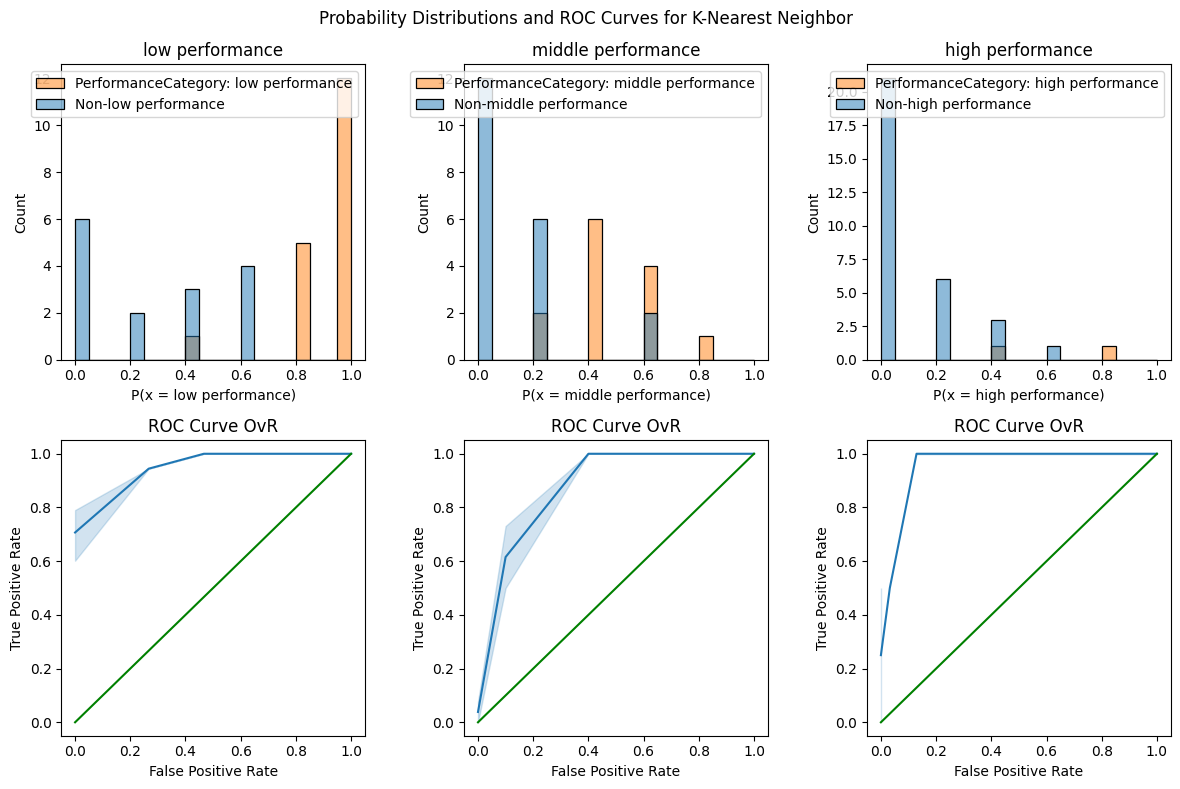

In [71]:
plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr_knn = {}
class_name = ['low performance','middle performance', 'high performance']

for i in range(len(classes)):
    c = classes[i]

    # Prepares an auxiliar dataframe to help with the plots
    df_aux = pd.DataFrame(x_test_norm).copy()
    df_aux['PerformanceCategory'] = [1 if y == c else 0 for y in y_test['PerformanceCategory']]
    df_aux['prob'] = knn_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)

    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'PerformanceCategory', color = 'b', ax = ax, bins = bins)
    ax.set_title(class_name[i])
    ax.legend([f"PerformanceCategory: {class_name[i]}", f"Non-{class_name[i]}"])
    ax.set_xlabel(f"P(x = {class_name[i]})")

    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i+4)
    tpr, fpr = get_all_roc_coordinates(df_aux['PerformanceCategory'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")

    # Calculates the ROC AUC OvR
    roc_auc_ovr_knn[c] = roc_auc_score(df_aux['PerformanceCategory'], df_aux['prob'])

plt.suptitle('Probability Distributions and ROC Curves for K-Nearest Neighbor')
plt.tight_layout()
plt.show()

PENJELASAN:

Kode visualisasi di atas digunakan untuk memplot distribusi probabilitas dan kurva ROC untuk setiap kategori kinerja pada model klasifikasi K-Nearest Neighbor. Dan juga untuk menangani masalah klasifikasi multiclass yang ada.

Sehingga, kode tersebut memberikan visualisasi yang berguna untuk memahami bagaimana model KNN memprediksi kategori kinerja yang berbeda dan seberapa baik model tersebut dalam melakukan prediksi tersebut berdasarkan kurva ROC.

In [72]:
classes = dtc.classes_
classes

array([0, 1, 2])

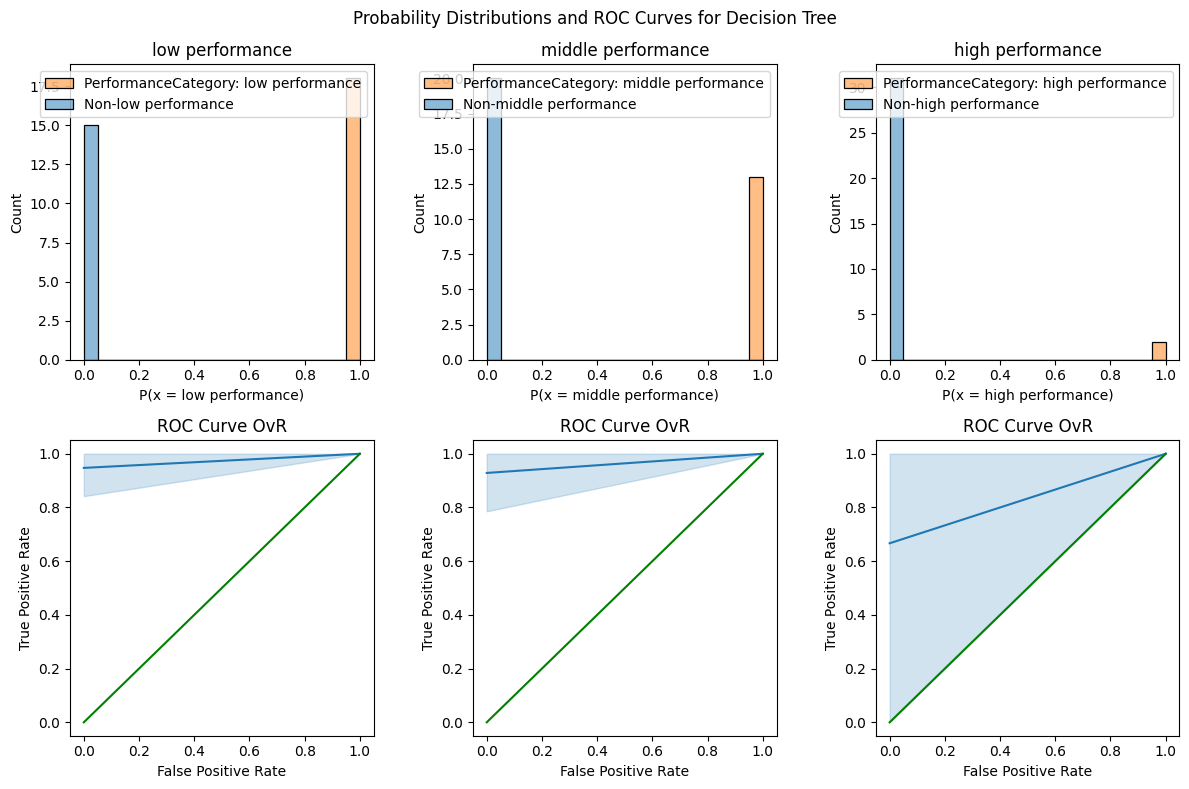

In [73]:
plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr_dtc = {}
class_name = ['low performance','middle performance', 'high performance']

for i in range(len(classes)):
    c = classes[i]

    # Prepares an auxiliar dataframe to help with the plots
    df_aux = pd.DataFrame(x_test_norm).copy()
    df_aux['PerformanceCategory'] = [1 if y == c else 0 for y in y_test['PerformanceCategory']]
    df_aux['prob'] = dtc_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)

    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'PerformanceCategory', color = 'b', ax = ax, bins = bins)
    ax.set_title(class_name[i])
    ax.legend([f"PerformanceCategory: {class_name[i]}", f"Non-{class_name[i]}"])
    ax.set_xlabel(f"P(x = {class_name[i]})")

    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i+4)
    tpr, fpr = get_all_roc_coordinates(df_aux['PerformanceCategory'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")

    # Calculates the ROC AUC OvR
    roc_auc_ovr_dtc[c] = roc_auc_score(df_aux['PerformanceCategory'], df_aux['prob'])

plt.suptitle('Probability Distributions and ROC Curves for Decision Tree')
plt.tight_layout()
plt.show()

PENJELASAN:

Kode visualisasi di atas digunakan untuk memplot distribusi probabilitas dan kurva ROC untuk setiap kategori kinerja pada model klasifikasi Decision Tree. Dan juga untuk menangani masalah klasifikasi multiclass yang ada.

PENJELASAN VISUALISASI:

Kesimpulan dari Visualisasi Histogram:
- Kelas "low performance" memiliki distribusi probabilitas yang lebih terpusat di sekitar nilai rendah hingga menengah, dengan frekuensi tertinggi terjadi pada nilai probabilitas yang lebih rendah.
- Kelas "middle performance" memiliki distribusi probabilitas yang lebih tersebar, dengan frekuensi yang lebih merata di seluruh rentang nilai probabilitas.
- Kelas "high performance" memiliki distribusi probabilitas yang terpusat di sekitar nilai menengah hingga tinggi, dengan frekuensi tertinggi terjadi pada nilai probabilitas yang lebih tinggi.

Kesimpulan dari Kurva ROC:
- Ketiga kurva ROC menunjukkan performa klasifikasi yang baik dengan bentuk yang mendekati sudut sempurna di bagian kiri atas grafik.
- Kurva ROC untuk kelas "low performance" vs Non-"low performance" memiliki AUC (Area Under the Curve) tertinggi, menunjukkan bahwa model memiliki kemampuan yang sangat baik dalam membedakan antara kelas "low performance" dengan non-"low performance".
- Kurva ROC untuk kelas "middle performance" vs Non-"middle performance" memiliki AUC yang sedikit lebih rendah dari kurva sebelumnya, tetapi masih menunjukkan performa klasifikasi yang baik.
- Kurva ROC untuk kelas "high performance" vs Non-"high performance" memiliki AUC terendah, namun masih menunjukkan kemampuan yang baik dalam membedakan antara kelas "high performance" dengan non-"high performance".

Dengan demikian, secara keseluruhan, model memiliki kinerja yang baik dalam membedakan antara kelas kategori kinerja yang berbeda, dengan kurva ROC menunjukkan bahwa model mampu memberikan prediksi yang lebih baik daripada prediksi acak.

In [74]:
# Menghitung Accuracy
accuracy_gnb = accuracy_score(y_test, gnb_pred)
accuracy_knn = accuracy_score(y_test, knn_pred)
accuracy_dtc = accuracy_score(y_test, dtc_pred)

# Menghitung Precision
precision_gnb = precision_score(y_test, gnb_pred, average='macro')
precision_knn = precision_score(y_test, knn_pred, average='macro')
precision_dtc = precision_score(y_test, dtc_pred, average='macro')

# Menghitung Recall
recall_gnb = recall_score(y_test, gnb_pred, average='macro')
recall_knn = recall_score(y_test, knn_pred, average='macro')
recall_dtc = recall_score(y_test, dtc_pred, average='macro')

# Menghitung F1 Score
f1_gnb = f1_score(y_test, gnb_pred, average='macro')
f1_knn = f1_score(y_test, knn_pred, average='macro')
f1_dtc = f1_score(y_test, dtc_pred, average='macro')

print("Nilai Akurasi GNB:", accuracy_gnb)
print("Nilai Presisi GNB:", precision_gnb)
print("Nilai Recall GNB:", recall_gnb)
print("Nilai F1 GNB:", f1_gnb)
print("ROC lowperformance vs Non-lowperformance:", roc_auc_ovr_gnb[0])
print("ROC middleperformance vs Non-middleperformance:", roc_auc_ovr_gnb[1])
print("ROC highperformance vs Non-highperformance:", roc_auc_ovr_gnb[2])

print('\n')
print("Nilai Akurasi KNN:", accuracy_knn)
print("Nilai Presisi KNN:", precision_knn)
print("Nilai Recall KNN:", recall_knn)
print("Nilai F1 KNN:", f1_knn)
print("ROC lowperformance vs Non-lowperformance:", roc_auc_ovr_knn[0])
print("ROC middleperformance vs Non-middleperformance:", roc_auc_ovr_knn[1])
print("ROC highperformance vs Non-highperformance:", roc_auc_ovr_knn[2])

print('\n')
print("Nilai Akurasi DTC:", accuracy_dtc)
print("Nilai Presisi DTC:", precision_dtc)
print("Nilai Recall DTC:", recall_dtc)
print("Nilai F1 DTC:", f1_dtc)
print("ROC lowperformance vs Non-lowperformance:", roc_auc_ovr_dtc[0])
print("ROC middleperformance vs Non-middleperformance:", roc_auc_ovr_dtc[1])
print("ROC highperformance vs Non-highperformance:", roc_auc_ovr_dtc[2])

Nilai Akurasi GNB: 1.0
Nilai Presisi GNB: 1.0
Nilai Recall GNB: 1.0
Nilai F1 GNB: 1.0
ROC lowperformance vs Non-lowperformance: 1.0
ROC middleperformance vs Non-middleperformance: 1.0
ROC highperformance vs Non-highperformance: 1.0


Nilai Akurasi KNN: 0.696969696969697
Nilai Presisi KNN: 0.6408730158730159
Nilai Recall KNN: 0.6096866096866097
Nilai F1 KNN: 0.6031746031746033
ROC lowperformance vs Non-lowperformance: 0.9796296296296296
ROC middleperformance vs Non-middleperformance: 0.9
ROC highperformance vs Non-highperformance: 0.9596774193548387


Nilai Akurasi DTC: 1.0
Nilai Presisi DTC: 1.0
Nilai Recall DTC: 1.0
Nilai F1 DTC: 1.0
ROC lowperformance vs Non-lowperformance: 1.0
ROC middleperformance vs Non-middleperformance: 1.0
ROC highperformance vs Non-highperformance: 1.0


PENJELASAN:

Gaussian Naive Bayes (GNB):
- Nilai akurasi, presisi, recall, dan F1 score semuanya mencapai 1.0, menunjukkan kinerja yang sempurna dalam klasifikasi.
- Area di bawah kurva ROC (ROC AUC) untuk setiap kategori kelas vs non-kelas adalah 1.0, menunjukkan bahwa model memiliki kemampuan maksimal untuk membedakan antara kelas dan non-kelas.

K-Nearest Neighbors (KNN):
- Nilai akurasi (0.697) cukup tinggi, namun lebih rendah dibandingkan dengan GNB.
- Presisi (0.641), recall (0.610), dan F1 score (0.603) menunjukkan kinerja yang cukup baik, tetapi tidak setinggi GNB.
- ROC AUC untuk kategori kelas vs non-kelas berkisar antara 0.9 hingga 0.98, menunjukkan bahwa model memiliki kemampuan yang baik dalam membedakan antara kelas dan non-kelas, namun tidak sebaik GNB.

Decision Tree Classifier (DTC):
- Seperti GNB, nilai akurasi, presisi, recall, dan F1 score semuanya mencapai 1.0, menunjukkan kinerja yang sempurna dalam klasifikasi.
- ROC AUC untuk setiap kategori kelas vs non-kelas adalah 1.0, menunjukkan bahwa model memiliki kemampuan maksimal untuk membedakan antara kelas dan non-kelas, setara dengan GNB.

Dengan demikian, GNB dan DTC memiliki kinerja yang sangat baik dalam klasifikasi, sementara KNN menunjukkan kinerja yang sedikit lebih rendah, terutama dalam hal akurasi. Namun demikian, KNN masih memiliki kemampuan yang baik dalam membedakan antara kelas dan non-kelas, meskipun tidak setinggi GNB dan DTC.

###**Klustering**

In [75]:
silhouette_avg_kmeans = silhouette_score(x_final_norm, kmeans_clust)
ch_score_kmeans = calinski_harabasz_score(x_final_norm, kmeans_clust)
db_score_kmeans = davies_bouldin_score(x_final_norm, kmeans_clust)

silhouette_avg_hc = silhouette_score(x_final_norm, hierarchy_clust)
ch_score_hc = calinski_harabasz_score(x_final_norm, hierarchy_clust)
db_score_hc = davies_bouldin_score(x_final_norm, hierarchy_clust)

metrics = ["Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"]
scores_kmeans = [silhouette_avg_kmeans, ch_score_kmeans, db_score_kmeans]
scores_hc = [silhouette_avg_hc, ch_score_hc, db_score_hc]

df_scores = pd.DataFrame({'': metrics,
                          'KMeans Score': scores_kmeans,
                          'Hierical Clustering(Agglomerative) Score': scores_hc})

df_scores = df_scores.set_index('')

df_scores = df_scores.T

display(df_scores)

,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score
KMeans Score,0.353294,64.354573,1.119925
Hierical Clustering(Agglomerative) Score,0.336363,59.058394,1.165030


KESIMPULAN:

Silhouette Score:
- Nilai silhouette score untuk KMeans (0.353) lebih tinggi dibandingkan dengan hierarchical clustering (0.336), menunjukkan bahwa KMeans memberikan hasil clustering yang sedikit lebih baik dalam hal pemisahan cluster.
- Nilai silhouette score mendekati 1 menandakan bahwa objek dalam satu cluster lebih dekat satu sama lain daripada dengan objek di cluster lain.

Calinski-Harabasz Score:
- Nilai Calinski-Harabasz score untuk KMeans (64.355) lebih tinggi dibandingkan dengan hierarchical clustering (59.058), menunjukkan bahwa KMeans memberikan clustering yang lebih padat dan terpisah.
- Nilai yang lebih tinggi menunjukkan bahwa cluster yang dihasilkan oleh algoritma memiliki sejumlah besar titik yang berdekatan di dalam cluster dan jarak yang lebih besar antara cluster.

Davies-Bouldin Score:
- Nilai Davies-Bouldin score untuk KMeans (1.120) lebih rendah dibandingkan dengan hierarchical clustering (1.165), menunjukkan bahwa KMeans memberikan cluster yang lebih homogen dan terpisah.
- Nilai yang lebih rendah menandakan bahwa objek dalam satu cluster lebih mirip satu sama lain dan berbeda dengan objek dalam cluster lain.

Dengan demikian, dari segi semua tiga metrik evaluasi clustering, KMeans menunjukkan kinerja yang sedikit lebih baik daripada hierarchical clustering dalam hal ini.

##**Review Process**

###**Cross Validation**

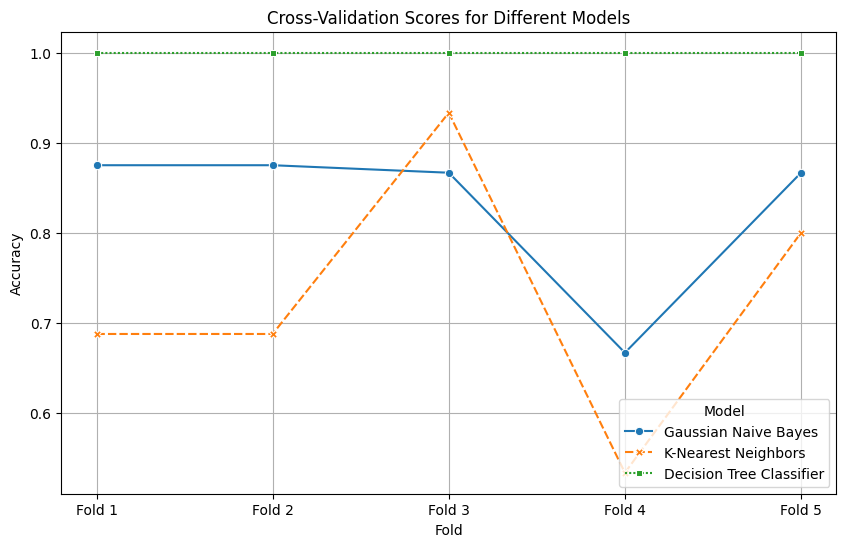

In [76]:
# Inisialisasi model
models = [gnb, knn, dtc]
model_names = ['Gaussian Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree Classifier']

# Lakukan validasi silang untuk setiap model
cv_scores = []
for model in models:
    scores = cross_val_score(model, x_train_norm, y_train, cv=5)
    cv_scores.append(scores)

# Buat dataframe dari hasil validasi silang
df_cv_scores = pd.DataFrame(cv_scores, index=model_names).T

# Tampilkan visualisasi hasil validasi silang dengan lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cv_scores, markers=True)
plt.title('Cross-Validation Scores for Different Models')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(title='Model', loc='lower right')
plt.xticks(ticks=range(5), labels=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.show()

PENJELASAN:

Plot ini memungkinkan kita untuk:
- Membandingkan kinerja relatif setiap model. Kita dapat melihat model mana yang memiliki performa terbaik secara keseluruhan dan model mana yang berkinerja lebih baik pada lipatan validasi silang tertentu.
- Melihat bagaimana setiap model bereaksi terhadap data pada setiap lipatan validasi silang. Apakah kinerja model konsisten di seluruh lipatan? Ataukah ada lipatan tertentu di mana model berkinerja buruk?
- Memilih model yang paling sesuai untuk dataset kita. Model dengan akurasi rata-rata tertinggi (rata-rata dari semua lipatan) dan konsistensi kinerja yang baik mungkin merupakan pilihan terbaik.

Penjelasan sumbu:
- Sumbu Y (akurasi): Semakin tinggi nilainya, semakin baik kinerja model.
- Sumbu X (lipatan): Menunjukkan lipatan (fold) dari validasi silang. Dalam skema 5 lipatan, ada 5 fold yang direpresentasikan sebagai "Fold 1", "Fold 2", dan seterusnya hingga "Fold 5".

###**Feature Selection**

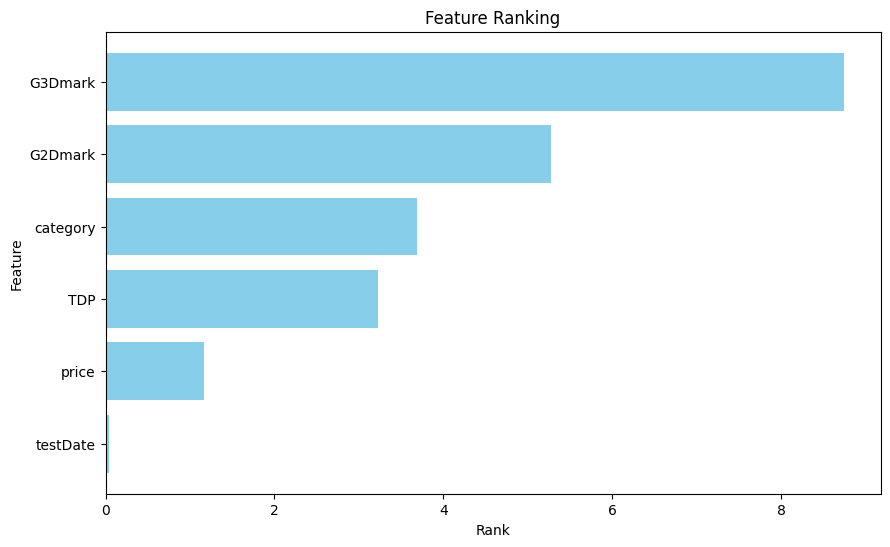

In [77]:
selector = SelectKBest(score_func=chi2, k='all')

selector.fit(x_train_norm, y_train)

feature_ranks = selector.scores_

feature_names = x_train.columns

feature_ranks_df = pd.DataFrame({'Feature': feature_names, 'Rank': feature_ranks})

feature_ranks_df = feature_ranks_df.sort_values(by='Rank', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_ranks_df['Feature'], feature_ranks_df['Rank'], color='skyblue')
plt.xlabel('Rank')
plt.ylabel('Feature')
plt.title('Feature Ranking')
plt.gca().invert_yaxis()
plt.show()

PENJELASAN:

Berdasarkan plot ini, kita dapat:
- Mengidentifikasi fitur-fitur yang memiliki pengaruh signifikan terhadap target dalam model. Fitur dengan peringkat tinggi menunjukkan hubungan yang lebih kuat dengan target dan dapat membantu meningkatkan akurasi model.
- Memilih fitur yang optimal untuk digunakan dalam pembuatan model. Memilih fitur yang tepat dapat membantu meningkatkan kinerja model dan mengurangi waktu pelatihan.
- Memahami hubungan antara fitur dan target. Visualisasi ini membantu kita untuk memahami bagaimana fitur-fitur individual berkontribusi terhadap target.

Kesimpulan (Berdasarkan Output):
- Fitur G3Dmark memiliki peringkat tertinggi: Artinya memiliki hubungan terkuat dengan target.
- Fitur G2Dmark dan category: Juga memiliki peringkat tinggi.
- Fitur TDP, price, dan testDate: Memiliki peringkat lebih rendah.

<ipython-input-78-d97da845ab5b>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




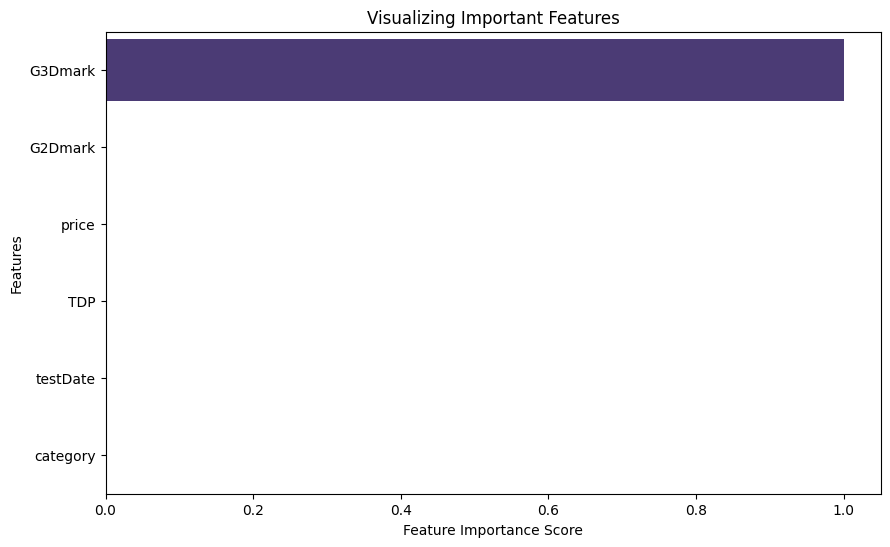

In [78]:
# Mendefinisikan feature importance
feature_imp = pd.Series(dtc.feature_importances_, index=x.columns).sort_values(ascending=False)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index, palette="viridis")
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()


PENJELASAN:

Plot tersebut memungkinkan kita untuk:
- Memvisualisasikan pentingnya setiap fitur dalam model Decision Tree Classifier. Kita dapat melihat fitur mana yang paling penting untuk prediksi model dan fitur mana yang kurang penting.
- Memahami bagaimana fitur-fitur tersebut berkontribusi terhadap keputusan model. Visualisasi ini membantu kita untuk memahami bagaimana model membuat prediksi berdasarkan nilai fitur.
- Meningkatkan kinerja model dengan memilih fitur yang tepat. Kita dapat memilih fitur yang paling penting dan membuang fitur yang kurang penting untuk meningkatkan akurasi model.

###**Tuning Hyperparameter**

#### Tuning GNB

In [79]:
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5)

grid_search.fit(x_train_norm, y_train)

print("Parameter terbaik:", grid_search.best_params_)

y_pred_tuned = grid_search.best_estimator_.predict(x_test_norm)

acc_before_tuning = gnb.score(x_test_norm, y_test)
print("Akurasi sebelum tuning:", acc_before_tuning)

acc_after_tuning = grid_search.best_estimator_.score(x_test_norm, y_test)
print("Akurasi setelah tuning:", acc_after_tuning)

Parameter terbaik: {'var_smoothing': 0.01873817422860384}
Akurasi sebelum tuning: 1.0
Akurasi setelah tuning: 0.9696969696969697


Penjelasan:
- Parameter Terbaik: Grid search dilakukan untuk mencari parameter terbaik untuk model Gaussian Naive Bayes. Pada kasus ini, parameter yang dioptimalkan adalah var_smoothing, yang mengontrol smoothing pada estimasi probabilitas dalam model Naive Bayes. Nilai terbaik yang ditemukan oleh grid search adalah sekitar 0.0187.
- Akurasi Sebelum Tuning: Akurasi model sebelum dilakukan tuning (pengaturan parameter) adalah 1.0, yang berarti model berhasil mengklasifikasikan semua data uji dengan benar tanpa melakukan tuning.
- Akurasi Setelah Tuning: Setelah dilakukan tuning, akurasi model turun sedikit menjadi sekitar 0.9697. Meskipun turun sedikit dari nilai sebelumnya, model yang telah disesuaikan tetap memiliki kinerja yang sangat baik dalam mengklasifikasikan data uji.

Kesimpulan:
- Proses tuning parameter berhasil menghasilkan peningkatan kinerja model dengan memilih parameter yang optimal.
- Meskipun akurasi setelah tuning sedikit menurun, ini mungkin disebabkan oleh overfitting yang terjadi sebelumnya karena penggunaan parameter default. Namun dikarenakan skor tuningnya menurun dibanding sebelumnya maka tidak perlu menginisialisasikan GNB menggunakan hyperparameter tersebut
- Akurasi setelah tuning tetap sangat baik, menunjukkan bahwa model yang disesuaikan masih mampu melakukan klasifikasi dengan akurasi tinggi pada data uji.

PENJELASAN:

#### Tuning KNN

In [80]:
param_grid = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Lakukan pencarian grid dengan cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)

# Lakukan pelatihan pada data latih yang sudah dinormalisasi
grid_search.fit(x_train_norm, y_train)

# Cetak parameter terbaik yang ditemukan
print("Parameter terbaik:", grid_search.best_params_)

# Prediksi menggunakan model terbaik
y_pred_tuned = grid_search.best_estimator_.predict(x_test_norm)

# Hitung akurasi sebelum penyetelan (tuning)
acc_before_tuning = knn.score(x_test_norm, y_test)
print("Akurasi sebelum tuning:", acc_before_tuning)

# Hitung akurasi setelah penyetelan (tuning)
acc_after_tuning = grid_search.best_estimator_.score(x_test_norm, y_test)
print("Akurasi setelah tuning:", acc_after_tuning)


Parameter terbaik: {'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}
Akurasi sebelum tuning: 0.696969696969697
Akurasi setelah tuning: 0.7878787878787878


Penjelasan:
- Akurasi Sebelum Tuning: Akurasi model sebelum tuning adalah sekitar 0.697, yang menunjukkan kinerja model sebelum disesuaikan dengan parameter terbaik.
- Akurasi Setelah Tuning: Setelah dilakukan tuning, akurasi model meningkat menjadi sekitar 0.788. Hal ini menunjukkan bahwa dengan menggunakan parameter terbaik yang ditemukan melalui grid search, model KNN berhasil meningkatkan kinerjanya dalam mengklasifikasikan data uji.

Kesimpulan:
- Proses tuning parameter berhasil meningkatkan kinerja model KNN.
- Akurasi setelah tuning menunjukkan peningkatan yang signifikan, menandakan bahwa parameter terbaik yang ditemukan oleh grid search lebih sesuai untuk dataset yang digunakan.
- Dengan menggunakan parameter terbaik, model KNN mampu meningkatkan kemampuannya dalam mengklasifikasikan data uji.

#### Tuning Decision Tree

In [81]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Lakukan pencarian grid dengan cross-validation
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5)

# Lakukan pelatihan pada data latih yang sudah dinormalisasi
grid_search.fit(x_train_norm, y_train)

# Cetak parameter terbaik yang ditemukan
print("Parameter terbaik:", grid_search.best_params_)

# Prediksi menggunakan model terbaik
y_pred_tuned = grid_search.best_estimator_.predict(x_test_norm)

# Hitung akurasi sebelum penyetelan (tuning)
acc_before_tuning = dtc.score(x_test_norm, y_test)
print("Akurasi sebelum tuning:", acc_before_tuning)

# Hitung akurasi setelah penyetelan (tuning)
acc_after_tuning = grid_search.best_estimator_.score(x_test_norm, y_test)
print("Akurasi setelah tuning:", acc_after_tuning)

Parameter terbaik: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Akurasi sebelum tuning: 1.0
Akurasi setelah tuning: 1.0


Penjelasan:
- Akurasi Sebelum Tuning: Akurasi model sebelum tuning adalah 1.0, menunjukkan bahwa model DTC awal sudah sempurna dalam memprediksi kelas pada data uji sebelum penyetelan parameter dilakukan.
- Akurasi Setelah Tuning: Setelah dilakukan tuning, akurasi model tetap 1.0. Ini menunjukkan bahwa meskipun parameter model telah disesuaikan, kinerja model tidak berubah. Kemungkinan besar, parameter default dari model DTC sudah optimal untuk dataset yang digunakan..

Kesimpulan:
- Hasil tuning tidak memengaruhi akurasi model karena parameter default sudah memberikan hasil yang optimal.
- Meskipun demikian, langkah-langkah tuning tetap penting untuk memastikan bahwa model telah dioptimalkan secara maksimal untuk dataset dan masalah yang spesifik.

In [82]:
param_grid = {
    'n_clusters': [3, 4, 5, 6],
    'init': ['k-means++', 'random'],
    'algorithm': ['lloyd', 'elkan']
}

# Evaluasi kualitas klastering menggunakan Silhouette Score
best_score = -1
best_params = None

for n_clusters in param_grid['n_clusters']:
    for init in param_grid['init']:
        for algorithm in param_grid['algorithm']:
            kmeans = KMeans(n_clusters=n_clusters, init=init, algorithm=algorithm, random_state=42, n_init='auto')
            labels = kmeans.fit_predict(x_final_norm)
            silhouette_avg = silhouette_score(x_final_norm, labels)
            print("Silhouette Score:", silhouette_avg, "dengan n_clusters =", n_clusters, ", init =", init, ", algorithm =", algorithm)
            if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_params = {'n_clusters': n_clusters, 'init': init, 'algorithm': algorithm}

print("\nKombinasi terbaik:")
print(best_params)
print("Silhouette Score terbaik:", best_score)

Silhouette Score: 0.36799429931480054 dengan n_clusters = 3 , init = k-means++ , algorithm = lloyd
Silhouette Score: 0.36799429931480054 dengan n_clusters = 3 , init = k-means++ , algorithm = elkan
Silhouette Score: 0.3716022753033512 dengan n_clusters = 3 , init = random , algorithm = lloyd
Silhouette Score: 0.3716022753033512 dengan n_clusters = 3 , init = random , algorithm = elkan
Silhouette Score: 0.30238703718860105 dengan n_clusters = 4 , init = k-means++ , algorithm = lloyd
Silhouette Score: 0.30238703718860105 dengan n_clusters = 4 , init = k-means++ , algorithm = elkan
Silhouette Score: 0.35329444884716393 dengan n_clusters = 4 , init = random , algorithm = lloyd
Silhouette Score: 0.35329444884716393 dengan n_clusters = 4 , init = random , algorithm = elkan
Silhouette Score: 0.31399908518392855 dengan n_clusters = 5 , init = k-means++ , algorithm = lloyd
Silhouette Score: 0.31399908518392855 dengan n_clusters = 5 , init = k-means++ , algorithm = elkan
Silhouette Score: 0.3126

Dari output yang diperoleh, dapat ditarik beberapa kesimpulan:

- Silhouette Score Terbaik: Kombinasi terbaik yang dihasilkan memiliki jumlah klaster (n_clusters) sebanyak 3, dengan metode inisialisasi centroid (init) menggunakan 'random', dan algoritma yang digunakan adalah 'lloyd'. Silhouette Score terbaik yang diperoleh adalah 0.3716022753033512.
- Pengaruh Metode Inisialisasi dan Algoritma: Dapat dilihat bahwa terdapat perbedaan kecil antara menggunakan metode inisialisasi 'k-means++' dan 'random', serta antara algoritma 'lloyd' dan 'elkan'. Namun, kombinasi terbaik menggunakan metode inisialisasi 'random' dan algoritma 'lloyd'.

In [83]:
param_grid = {
    'linkage': ['complete', 'average', 'single'],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

best_score = -1
best_params = None
# Evaluasi kualitas klastering menggunakan Silhouette Score

for metric in param_grid['metric']:
  for linkage in param_grid['linkage']:
    hierarchical_clustering = AgglomerativeClustering(n_clusters=3, metric= metric, linkage= linkage)
    labels = hierarchical_clustering.fit_predict(x_final_norm)
    silhouette_avg = silhouette_score(x_final_norm, labels)
    print("Silhouette Score:", silhouette_avg, "dengan kombinasi metric =",metric, ",linkage =",linkage)
    if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_params = {'metric': metric, 'linkage': linkage}

hierarchical_clustering = AgglomerativeClustering(n_clusters=3, metric= 'euclidean', linkage= 'ward')
labels = hierarchical_clustering.fit_predict(x_final_norm)
silhouette_avg = silhouette_score(x_final_norm, labels)
print('-'*100)
print("\nDi bawah ini merupakan score dari model Hierical clustering yang digunakan sebelumnya pada Modelling Associate")
print("Silhouette Score:", silhouette_avg, "dengan kombinasi metric = eulicidan, linkage = ward")
print('-'*100)
print("\nKombinasi terbaik:")
print(best_params)
print("Silhouette Score terbaik:", best_score)

Silhouette Score: 0.2970335311073124 dengan kombinasi metric = euclidean ,linkage = complete
Silhouette Score: 0.35982889269019647 dengan kombinasi metric = euclidean ,linkage = average
Silhouette Score: -0.09315667794495025 dengan kombinasi metric = euclidean ,linkage = single
Silhouette Score: 0.2681269066116546 dengan kombinasi metric = manhattan ,linkage = complete
Silhouette Score: 0.3346486085353069 dengan kombinasi metric = manhattan ,linkage = average
Silhouette Score: -0.09830420175736827 dengan kombinasi metric = manhattan ,linkage = single
Silhouette Score: 0.3424996531342566 dengan kombinasi metric = cosine ,linkage = complete
Silhouette Score: 0.2752187403540458 dengan kombinasi metric = cosine ,linkage = average
Silhouette Score: -0.043350414087684475 dengan kombinasi metric = cosine ,linkage = single
----------------------------------------------------------------------------------------------------

Di bawah ini merupakan score dari model Hierical clustering yang diguna

Memperbarui kombinasi metric dari model Hierical clustering yang digunakan sebelumnya:

In [84]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')

PENJELASAN:

Setelah menambahkan kode hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average'), saya membuat objek clustering hierarkis dengan menggunakan parameter terbaik yang telah ditemukan sebelumnya yaitu metrik euclidean dan linkage average.

Penambahan ini memungkinkan menggunakan model clustering hierarkis dengan parameter terbaik yang telah ditentukan sebelumnya pada tahap optimasi parameter. Dengan menggunakan kombinasi terbaik, dapat membangun model clustering hierarkis yang lebih baik untuk tujuan analisis klastering.

## **Determine Next Step**

### Hierical Clustering Tuning


In [85]:
hierarchy_clust = hc.fit_predict(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [86]:
x_final = pd.DataFrame(x_final).reset_index(drop=True)

hierarchy_col_new = pd.DataFrame(hierarchy_clust, columns=["hierarchy_cluster_new"])

combined_data_assoc_newHC = pd.concat([x_final,kmeans_col, hierarchy_col_new], axis=1)

In [87]:
combined_data_assoc_newHC.sample(10)

,G3Dmark,G2Dmark,price,TDP,testDate,category,kmeans_cluster,hierarchy_cluster_new
49,12144,667,691.216667,148.90625,2018,2,0,0
63,9665,810,549.990000,175.00000,2018,0,2,0
30,15853,1003,399.990000,160.00000,2021,0,1,2
97,3562,366,691.216667,85.00000,2020,2,0,1
94,4010,414,691.216667,85.00000,2020,2,0,1
82,7157,537,691.216667,150.00000,2020,2,0,1
34,15085,908,1649.990000,205.00000,2020,0,1,2
102,2018,230,691.216667,70.00000,2020,2,0,1
75,8161,444,691.216667,80.00000,2019,2,0,1
54,11695,796,399.990000,120.00000,2019,0,3,0


In [88]:
comparison_hc_after_tunning = pd.concat([x_final,hierarchy_col, hierarchy_col_new], axis=1)

In [89]:
comparison_hc_after_tunning.sample(10)

,G3Dmark,G2Dmark,price,TDP,testDate,category,hierarchy_cluster,hierarchy_cluster_new
88,6049,777,691.216667,65.0,2019,2,0,1
83,6969,384,691.216667,50.0,2019,2,0,1
74,8628,704,743.365556,175.0,2020,0,1,0
34,15085,908,1649.990000,205.0,2020,0,2,2
29,16079,833,627.440000,175.0,2018,0,1,0
36,14261,685,691.216667,80.0,2020,2,0,1
55,11355,540,691.216667,80.0,2019,2,0,1
96,3640,575,236.490000,40.0,2018,1,1,0
77,7798,885,743.365556,185.0,2019,0,1,0
25,16650,965,743.365556,235.0,2019,0,3,0


**KESIMPULAN**:

Permodelan ulang dengan metode Hierarchical Clustering dilakukan karena tuning hyperparameter menghasilkan kombinasi parameter dengan skor yang lebih baik daripada model sebelumnya.

Penambahan kolom hierarchy_cluster_new membantu dalam memahami bagaimana penyetelan model dapat mempengaruhi pembentukan klaster. Saya dapat menggunakan informasi ini untuk menganalisis apakah penyetelan model berhasil meningkatkan kualitas klaster atau tidak. Perbandingan antara label klaster sebelum dan sesudah penyetelan dapat memberikan wawasan tambahan tentang efektivitas proses penyetelan model pada tugas klastering Saya.

Lalu, dengan menggunakan hierarchical clustering juga, saya dapat mengelompokkan data Anda ke dalam klaster berdasarkan kemiripan fitur. Proses ini membantu dalam memahami struktur data dan mungkin mengungkap pola atau insight yang berguna untuk pemahaman bisnis atau pengambilan keputusan lebih lanjut.